In [6]:
import cv2
import os
import pandas as pd
import numpy as np
import scipy.io
from PIL import Image
from matplotlib import pyplot as plt

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
cd /content/gdrive/My Drive/Aramco_Upstream_2020

/content/gdrive/My Drive/Aramco_Upstream_2020


In [9]:
data_dir = r'./data'

In [10]:
os.listdir(data_dir)

['Beta_1_0.2.mat',
 'Beta_1_0.5.mat',
 'Beta_1_0.mat',
 'Beta_2_0.2.mat',
 'Beta_2_0.5.mat',
 'Beta_2_0.mat',
 'Mono_1_0.2.mat',
 'Mono_1_0.5.mat',
 'Mono_1_0.mat',
 'Mono_2_0.2.mat',
 'Mono_2_0.5.mat',
 'Mono_2_0.mat',
 'Mono_3_0.2.mat',
 'Mono_3_0.5.mat',
 'Mono_3_0.mat',
 'Normal_1_0.2.mat',
 'Normal_1_0.5.mat',
 'Normal_1_0.mat',
 'Normal_2_0.2.mat',
 'Normal_2_0.5.mat',
 'Normal_2_0.mat',
 'Normal_3_0.2.mat',
 'Normal_3_0.5.mat',
 'Normal_3_0.mat',
 'Uniform_1_0.2.mat',
 'Uniform_1_0.5.mat',
 'Uniform_1_0.mat',
 'Uniform_2_0.2.mat',
 'Uniform_2_0.5.mat',
 'Uniform_2_0.mat',
 'Uniform_3_0.2.mat',
 'Uniform_3_0.5.mat',
 'Uniform_3_0.mat']

In [11]:
beta_mat = scipy.io.loadmat(os.path.join(data_dir, 'Normal_3_0.5.mat'))
print(beta_mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'bwImage', 'ctImage', 'predImage'])


In [12]:
print(beta_mat['bwImage'].shape)
print(beta_mat['ctImage'].shape)
print(beta_mat['predImage'].shape)

(547, 547, 547)
(547, 547, 547)
(547, 547, 547)


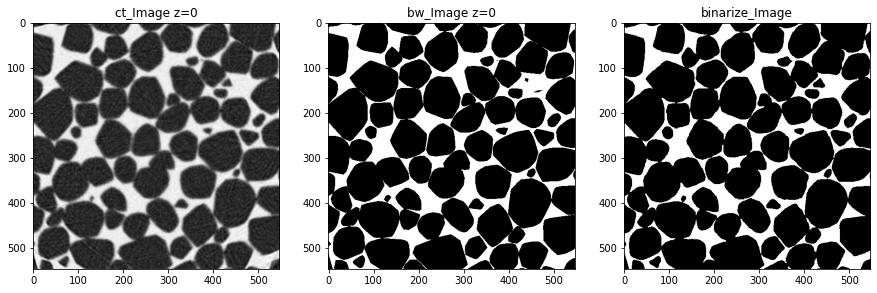

In [13]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(15,15))
ax1.imshow(beta_mat['ctImage'][:,:,0], cmap='Greys')
ax1.title.set_text("ct_Image z=0")

ax2.imshow(beta_mat['bwImage'][:,:,0], cmap='Greys')
ax2.title.set_text(f"bw_Image z=0")

ax3.imshow(beta_mat['predImage'][:,:,0], cmap='Greys')
ax3.title.set_text(f"binarize_Image")

plt.show()

In [14]:
beta_mat['bwImage'][:,:,40].sum()

190872

In [15]:
beta_mat['bwImage'][:,:,40].shape

(547, 547)

In [16]:
((534*534) - 141957) / (534*534)

0.5021777553339225

In [17]:
beta_mat['predImage'][:,:,40].sum()

190422

In [18]:
((534*534) - 134915) / (534*534)

0.526873009861269

# Пористость

Считаем пористость как отношение объема пор к общему объему   
В слайсах bwImage - считаем что 1 - это объект, 0 - нет объекта (пористость)

In [19]:
# Объем грунта true_binarize
V_objects = beta_mat['bwImage'].sum()
print(V_objects)

107684812


In [20]:
# Объем грунта predict binarize
V_pred_objects = beta_mat['predImage'].sum()
print(V_pred_objects)

107740862


In [21]:
# Общий объем образца
size_sample = beta_mat['predImage'].shape
print(size_sample)
V_sample = size_sample[0]*size_sample[1]*size_sample[2]
print(V_sample)

(547, 547, 547)
163667323


In [22]:
# Пористость по всему образцу
porosity_true_sample = (V_sample - V_objects) / V_sample
porosity_predbin_sample = (V_sample - V_pred_objects) / V_sample
print('porosity_true_sample', porosity_true_sample)
print('porosity_predict_binarize_sample', porosity_predbin_sample)

porosity_true_sample 0.3420506303509345
porosity_predict_binarize_sample 0.3417081673658217


### Расчитаем пористость для всех образцов

In [23]:
for filename in os.listdir(data_dir):
    extension = filename.split('.')[-1]
    if extension == 'mat':
        mat = scipy.io.loadmat(os.path.join(data_dir, filename))
        
        V_objects = mat['bwImage'].sum()
        V_pred_objects = mat['predImage'].sum()
        size_sample = mat['predImage'].shape
        V_sample = size_sample[0]*size_sample[1]*size_sample[2]
        porosity_true_sample = (V_sample - V_objects) / V_sample
        porosity_predbin_sample = (V_sample - V_pred_objects) / V_sample
        print(f"{filename} true_porosity = {porosity_true_sample}, predbin_porosity = {porosity_predbin_sample}")
        del mat

Beta_1_0.2.mat true_porosity = 0.33757950907187767, predbin_porosity = 0.33943041178764133
Beta_1_0.5.mat true_porosity = 0.33533961484164154, predbin_porosity = 0.33822998151482037
Beta_1_0.mat true_porosity = 0.36716691822890835, predbin_porosity = 0.36839389904665165
Beta_2_0.2.mat true_porosity = 0.3476389541056017, predbin_porosity = 0.3485340898821394
Beta_2_0.5.mat true_porosity = 0.34720856775073783, predbin_porosity = 0.3491155467935038
Beta_2_0.mat true_porosity = 0.3841480447551069, predbin_porosity = 0.3864358325081066
Mono_1_0.2.mat true_porosity = 0.33865160824964907, predbin_porosity = 0.34167063081740634
Mono_1_0.5.mat true_porosity = 0.335870619867566, predbin_porosity = 0.3385100541302111
Mono_1_0.mat true_porosity = 0.3730443345534117, predbin_porosity = 0.375424133880559
Mono_2_0.2.mat true_porosity = 0.3483297854276982, predbin_porosity = 0.3496049322934063
Mono_2_0.5.mat true_porosity = 0.3419709584575988, predbin_porosity = 0.3441388373409419
Mono_2_0.mat true_po

### Динамика пористости по слайсам (слайсы по оси z)

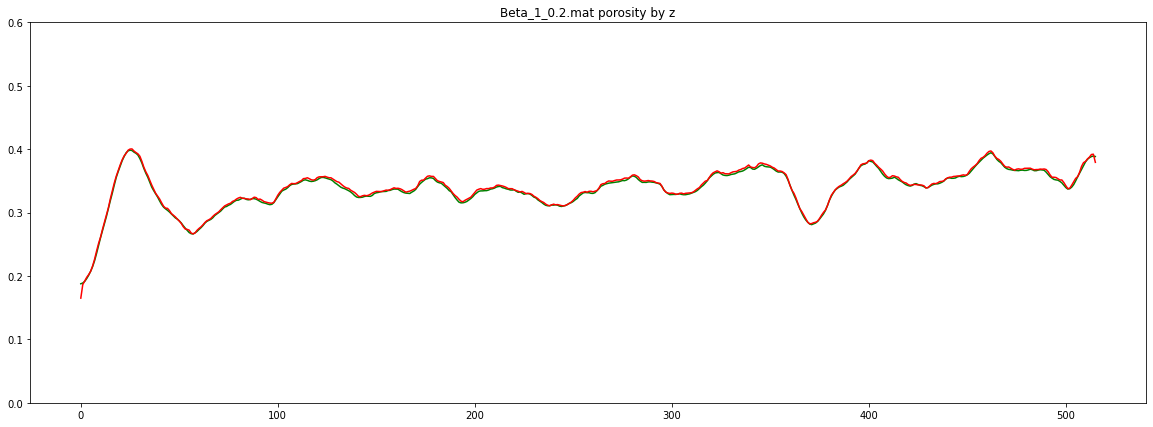

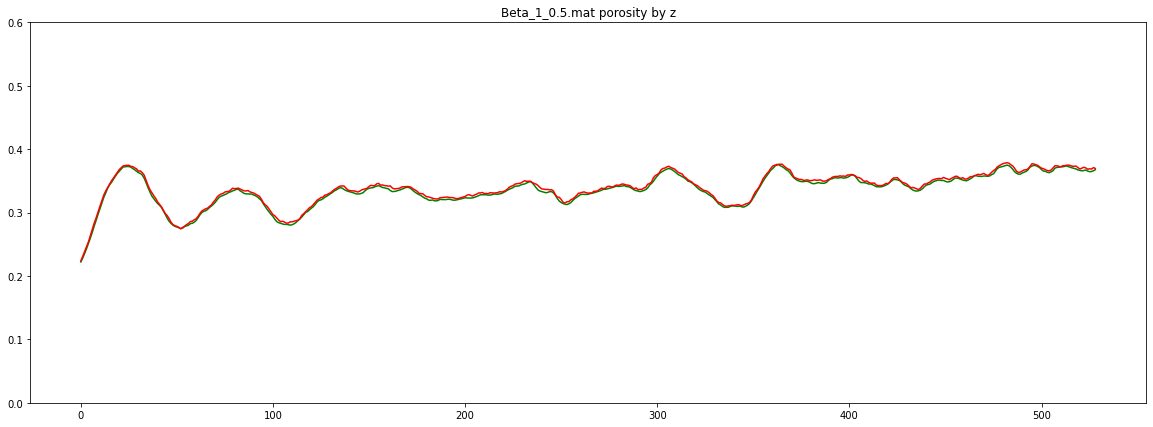

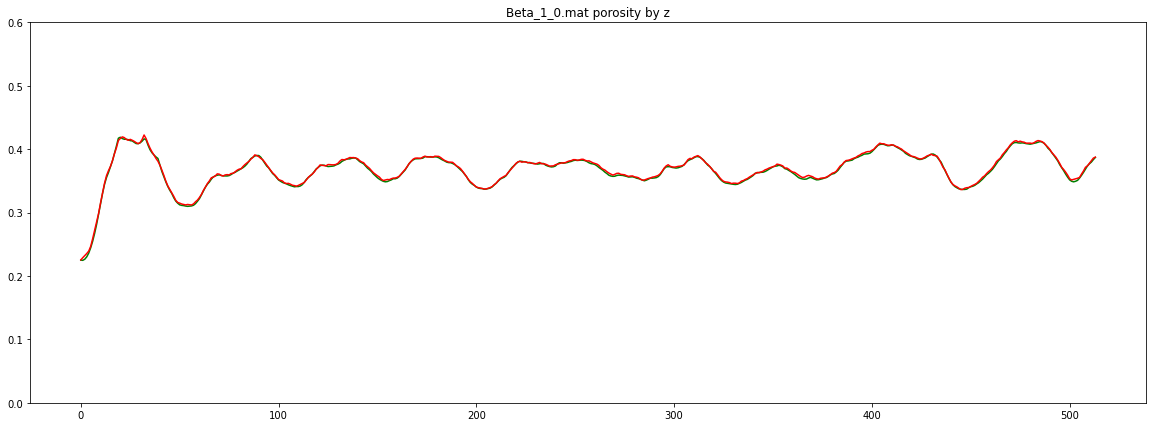

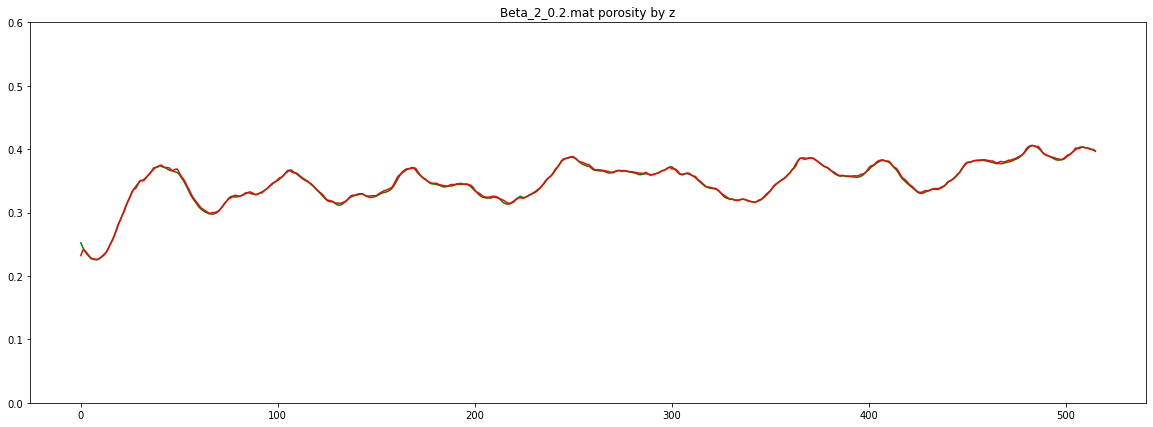

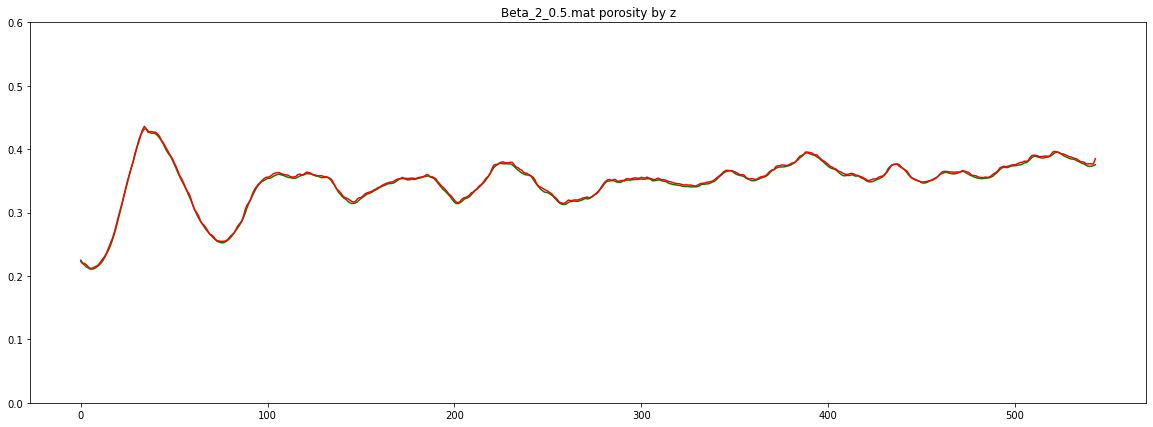

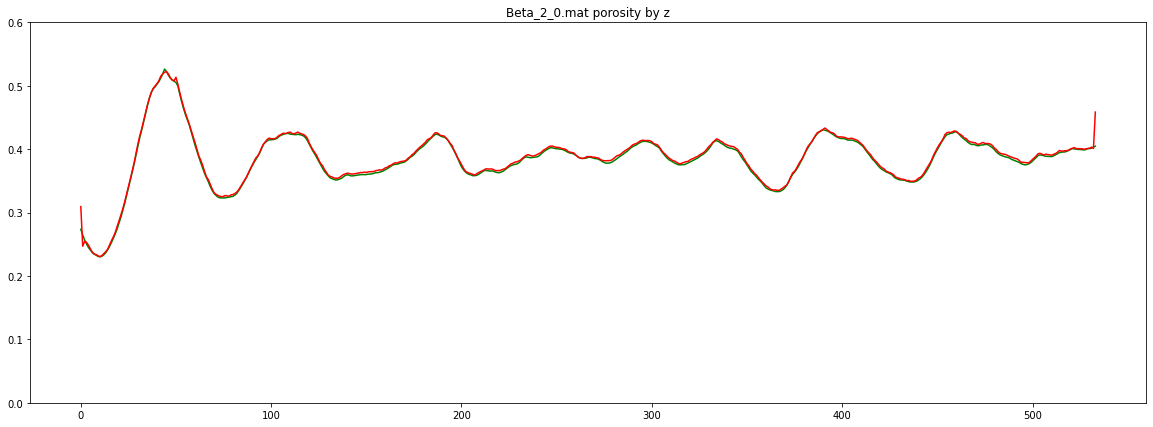

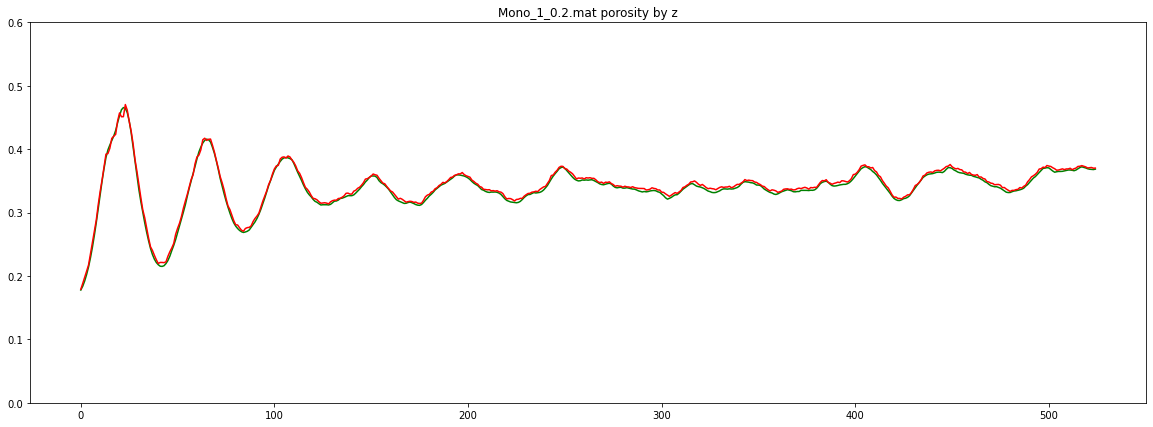

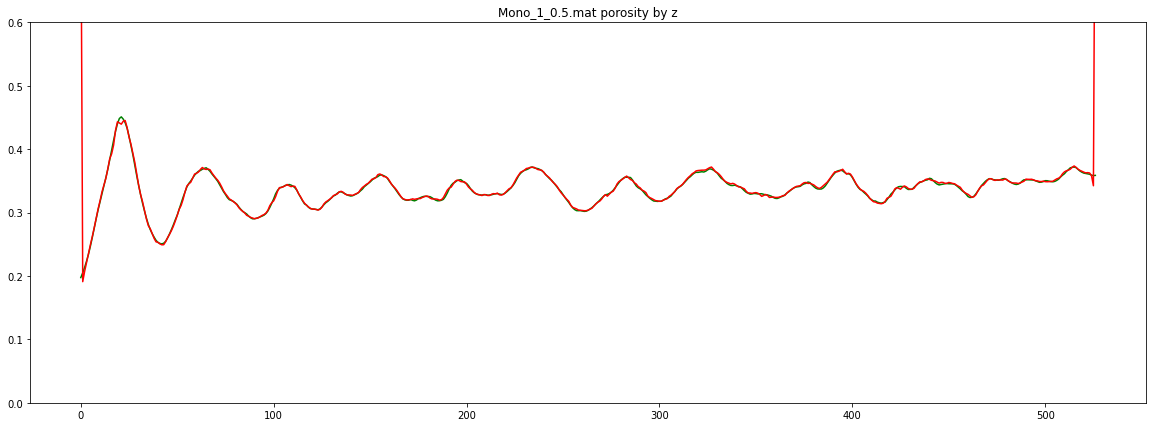

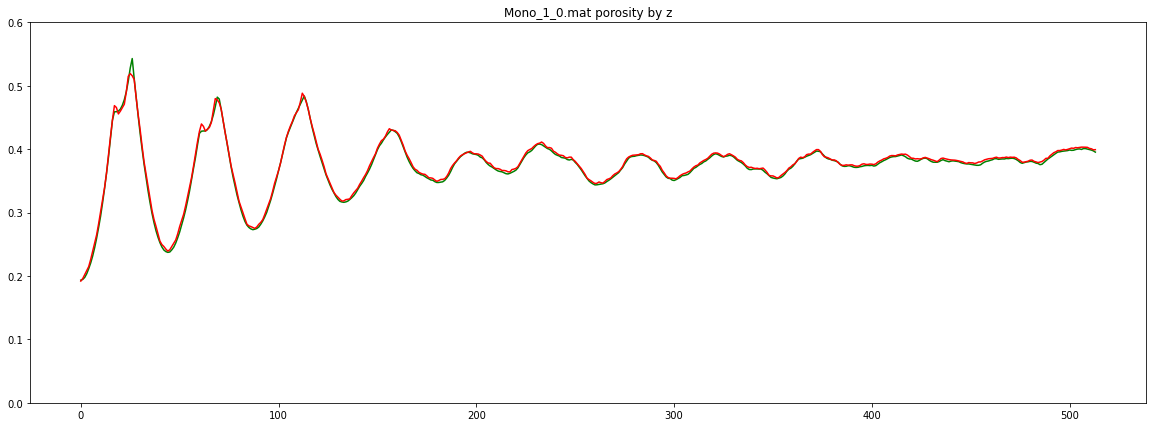

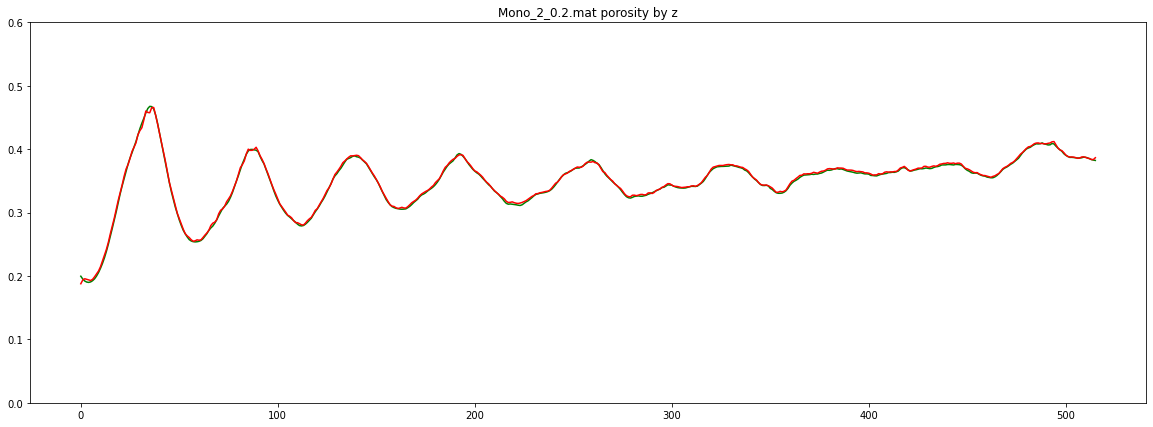

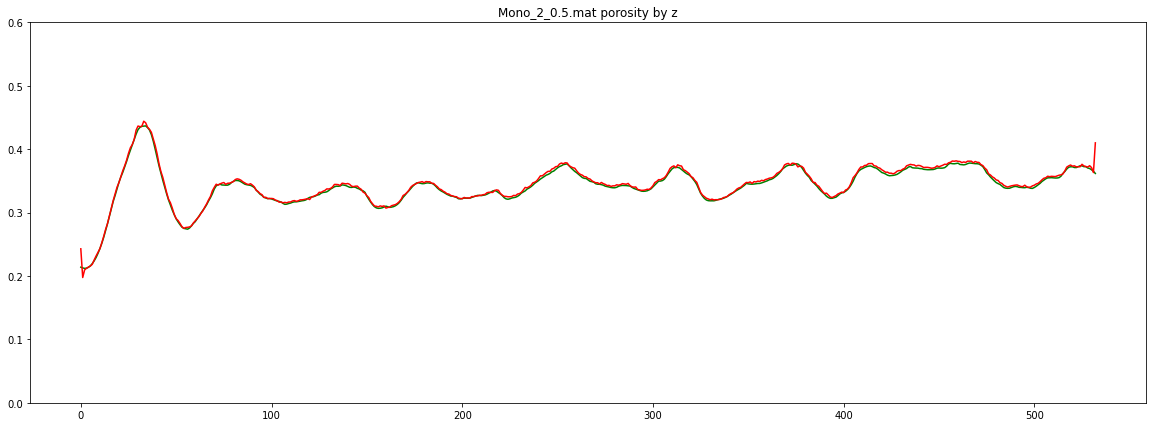

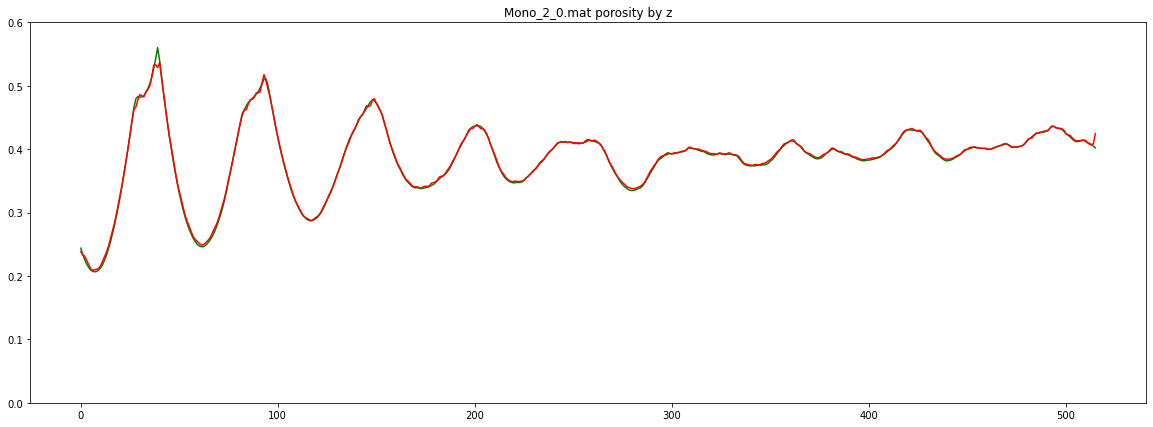

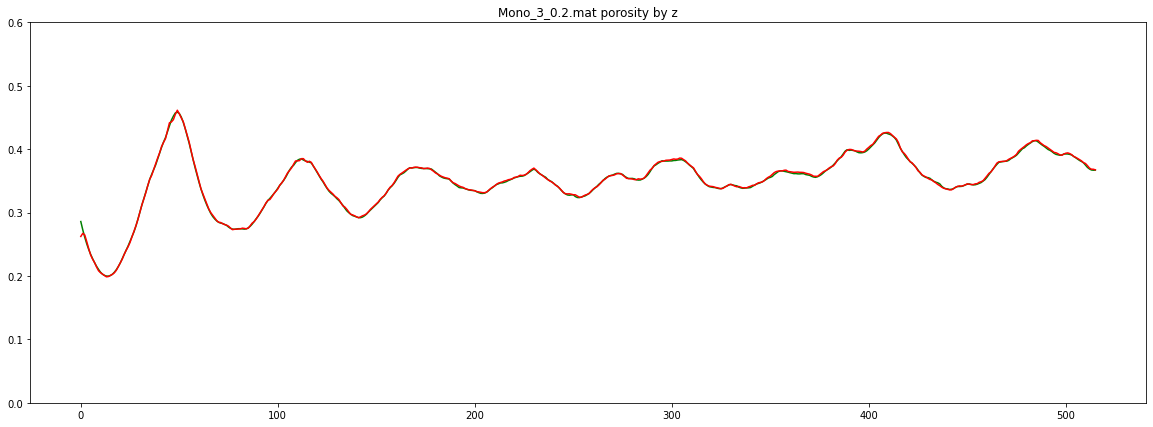

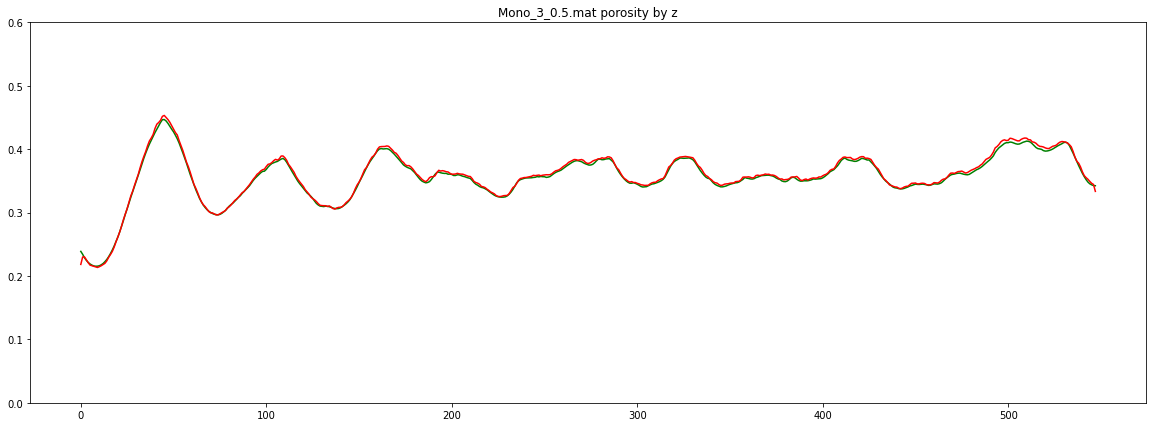

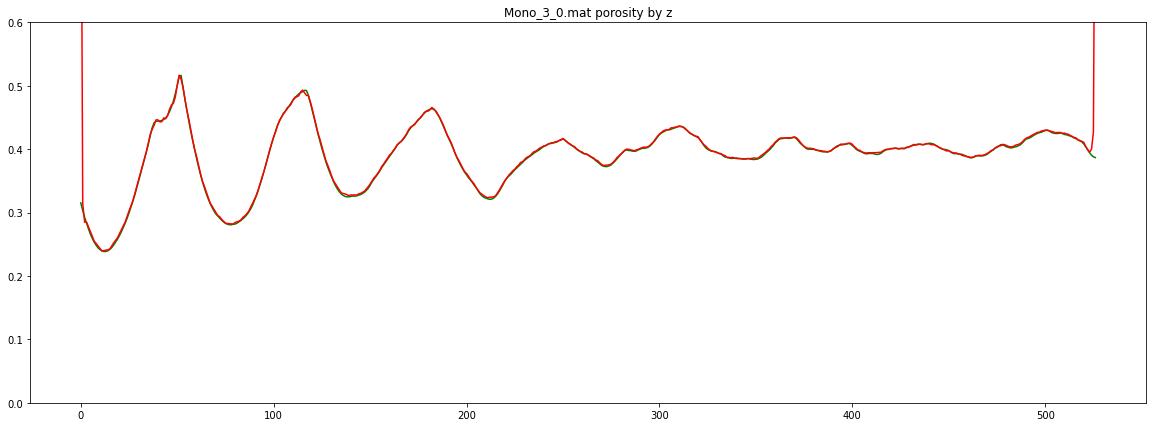

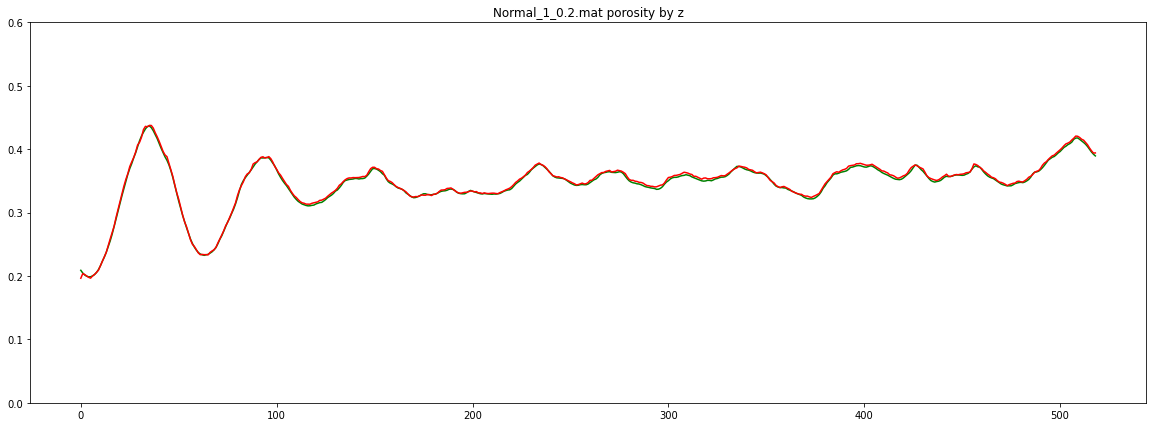

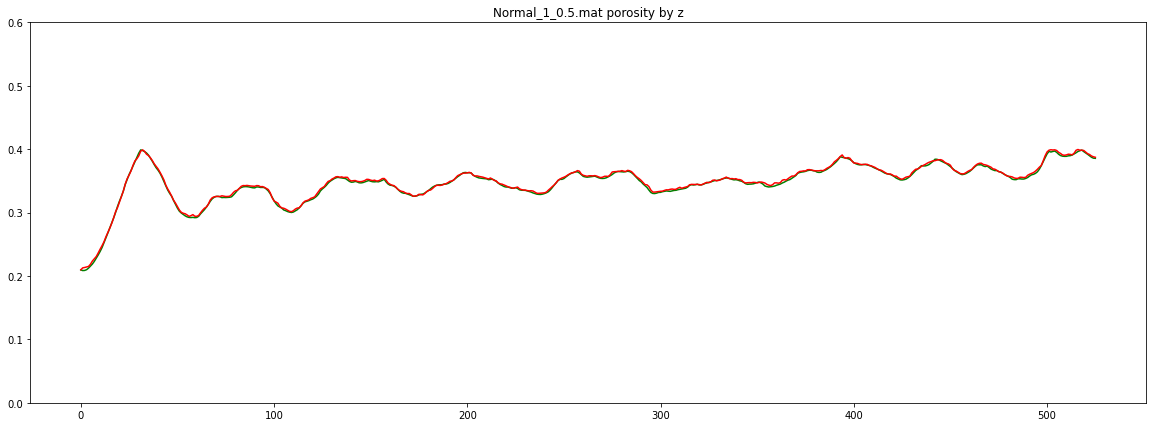

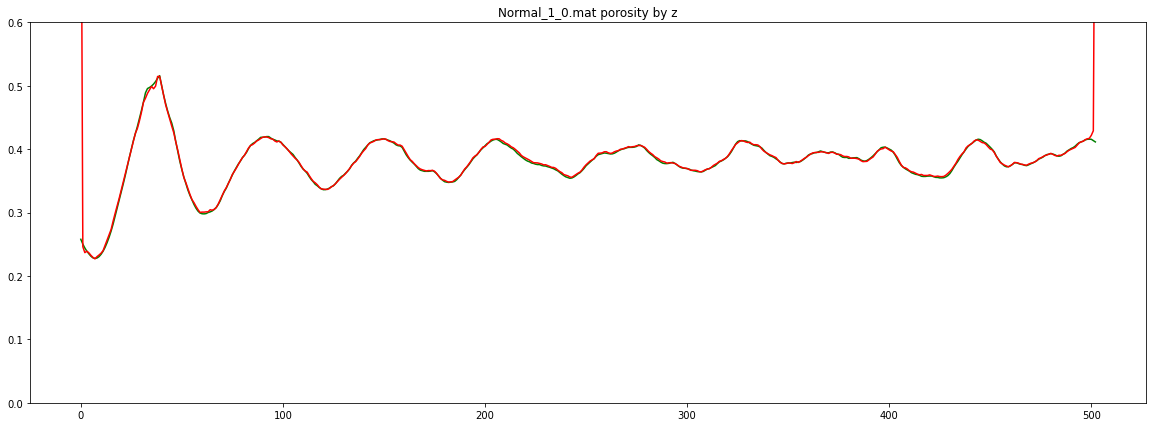

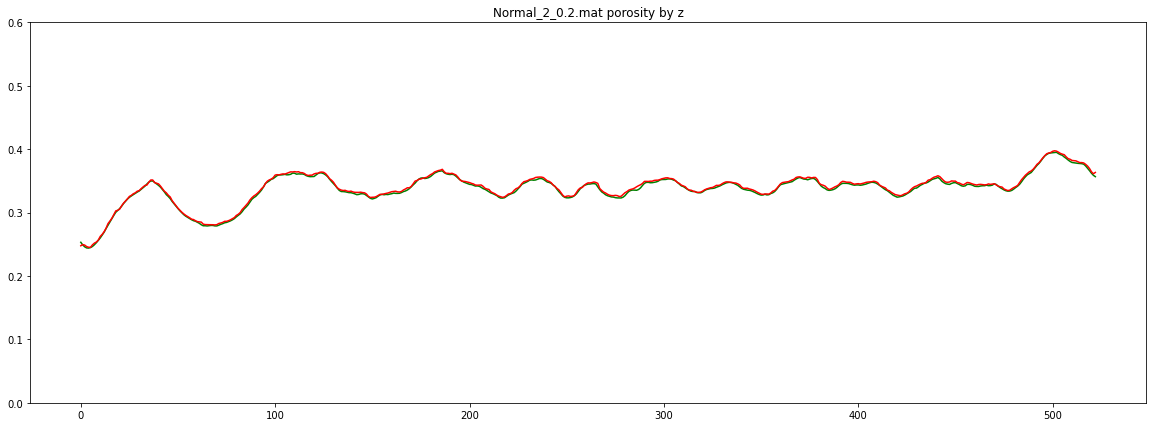

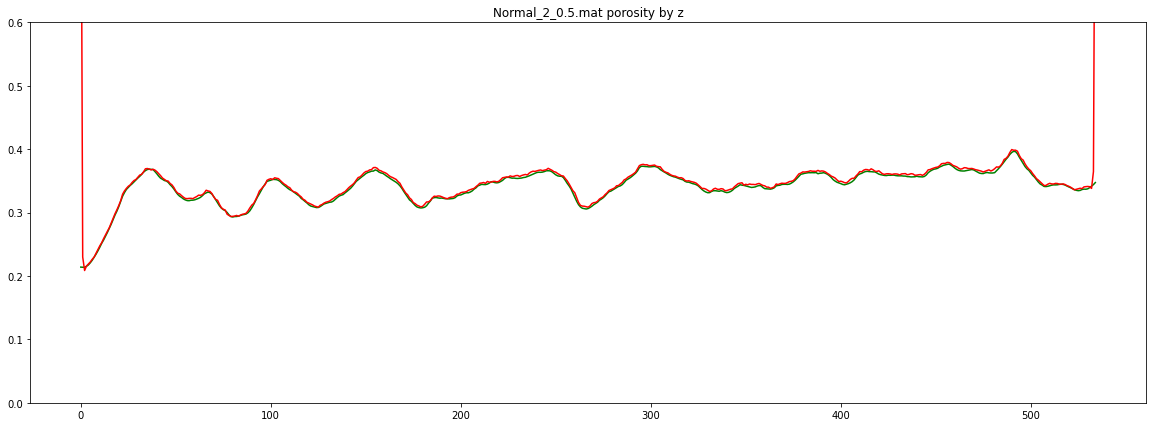

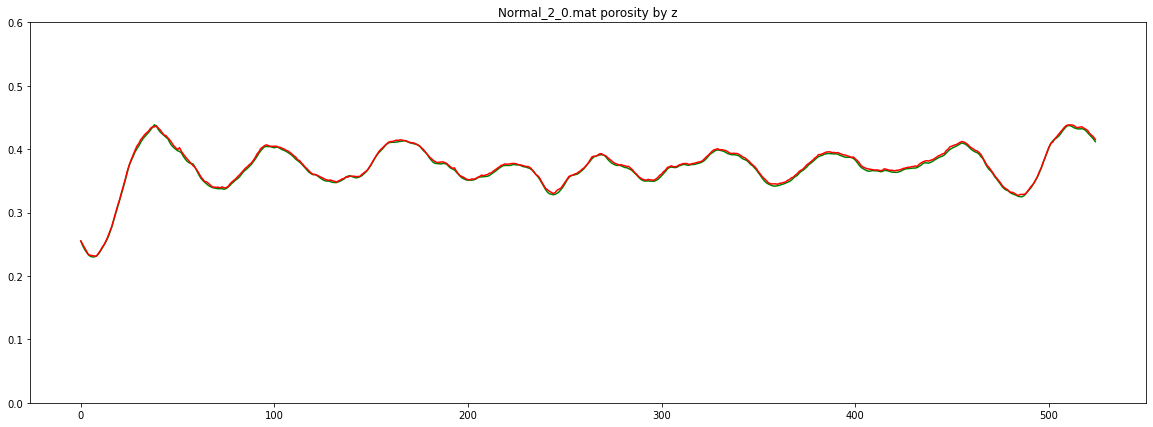

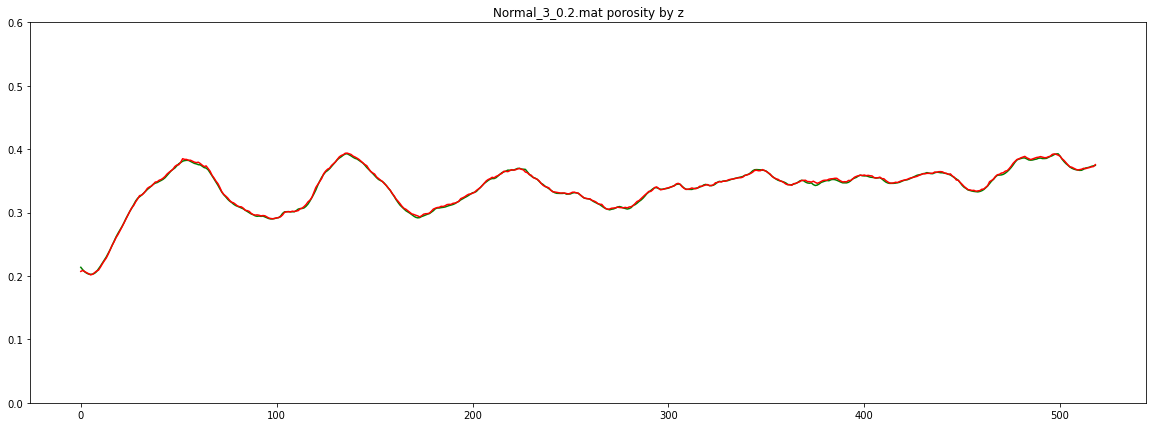

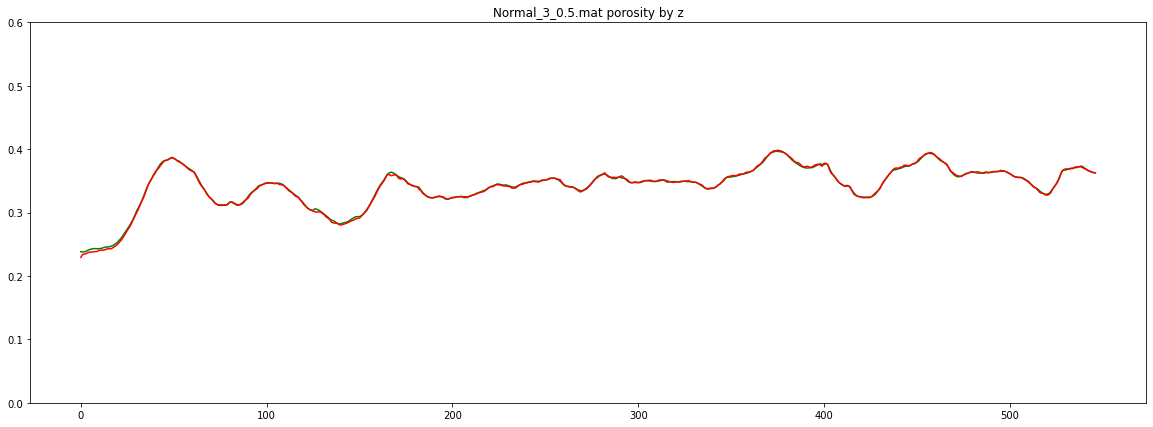

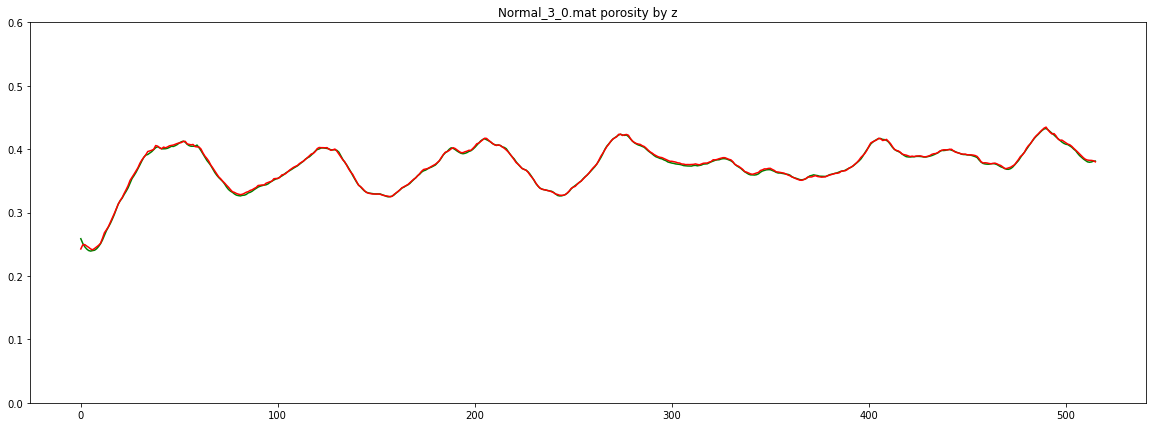

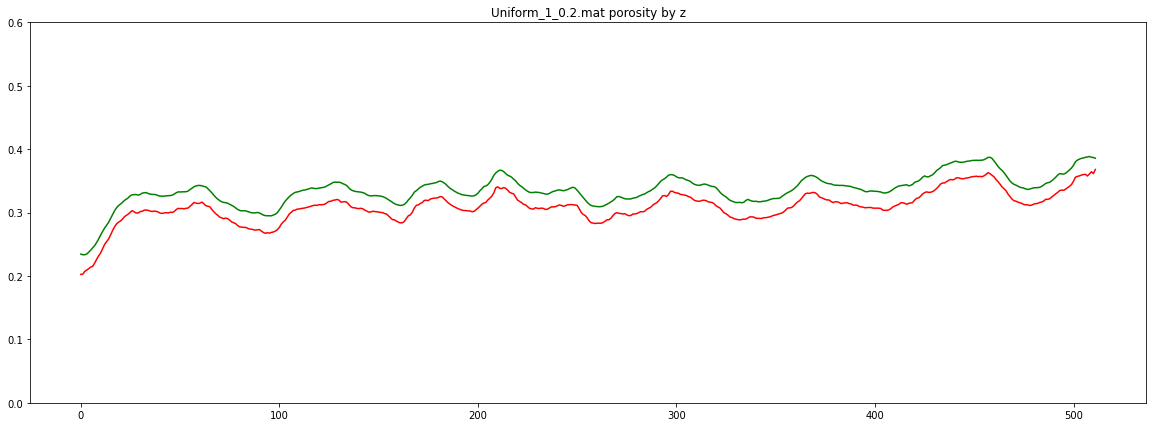

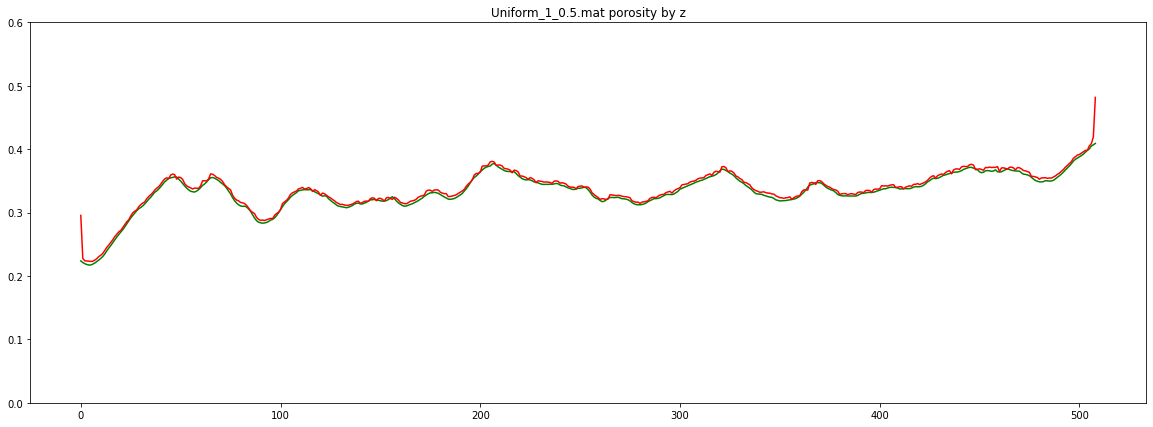

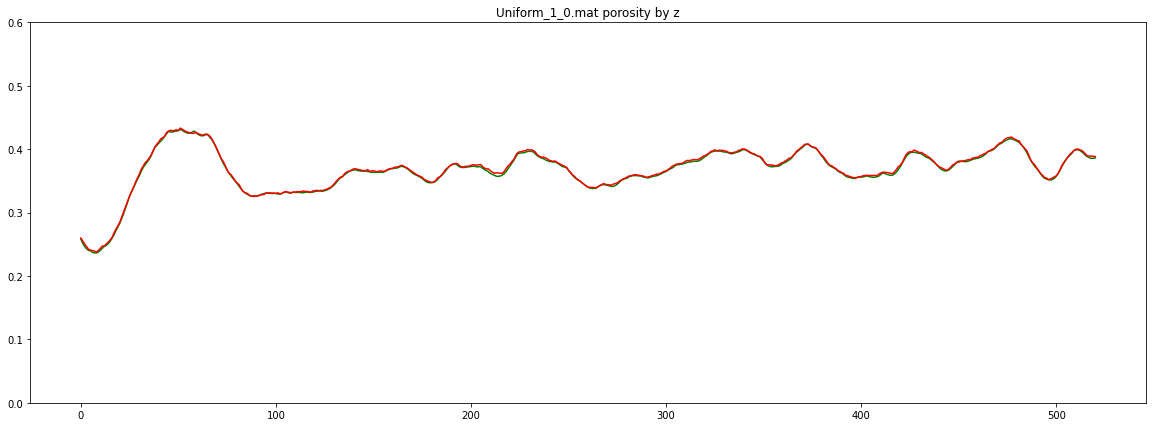

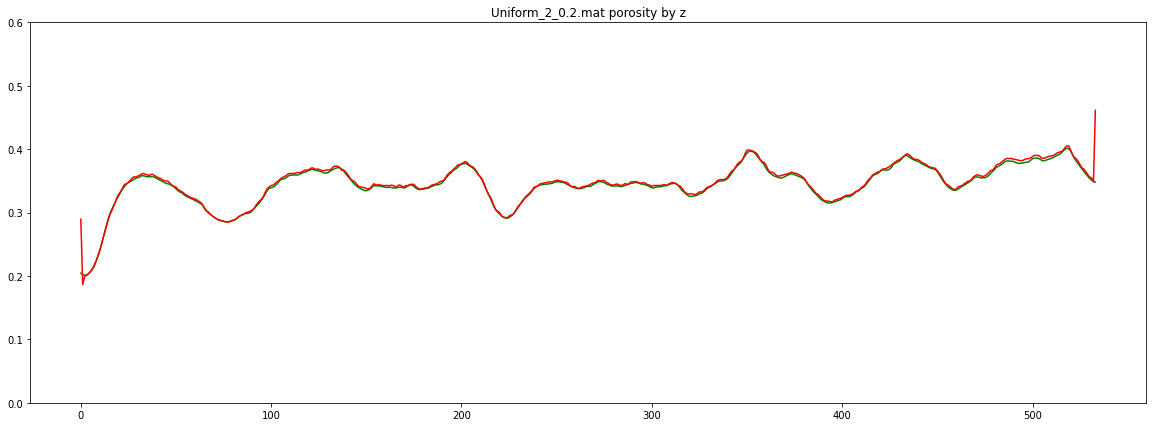

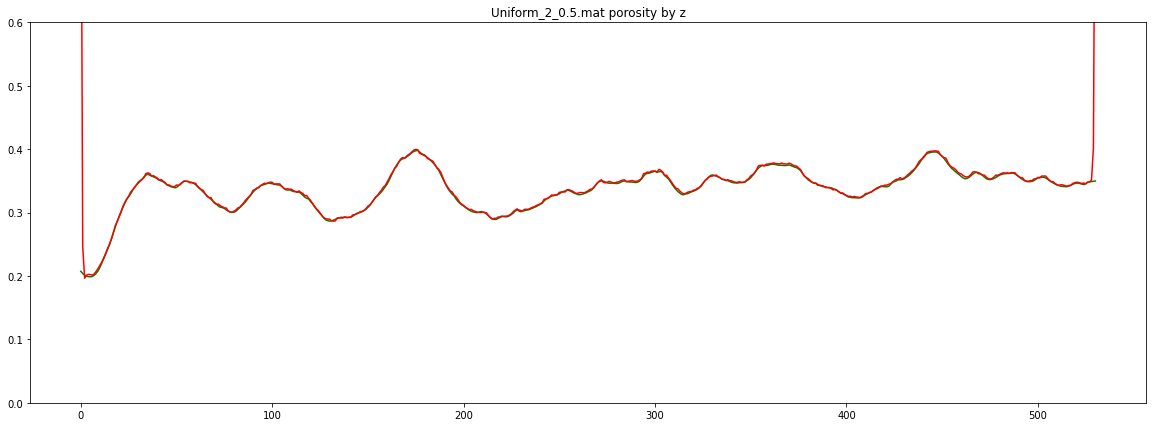

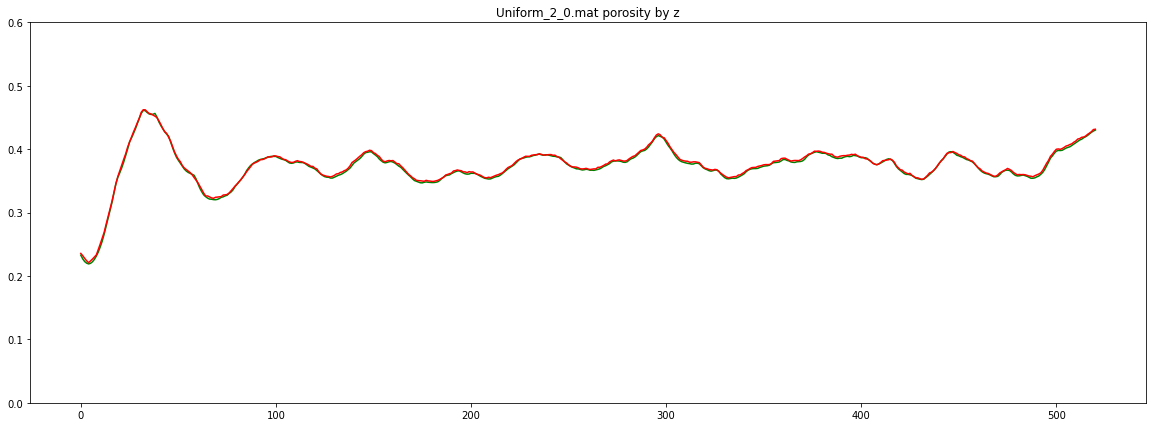

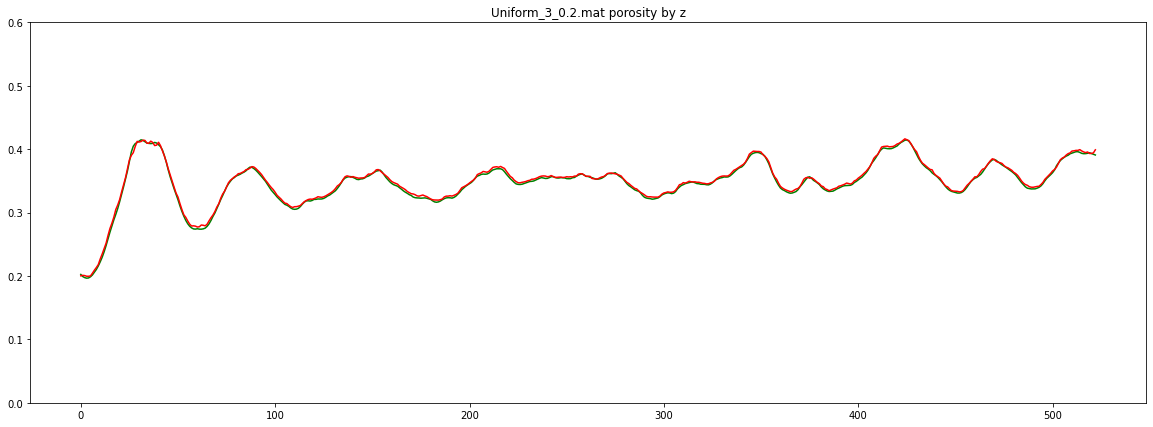

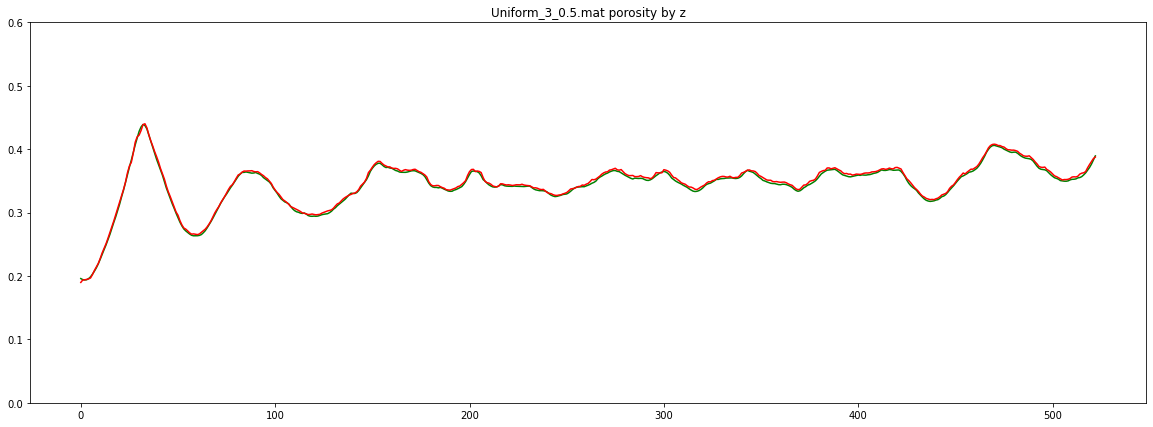

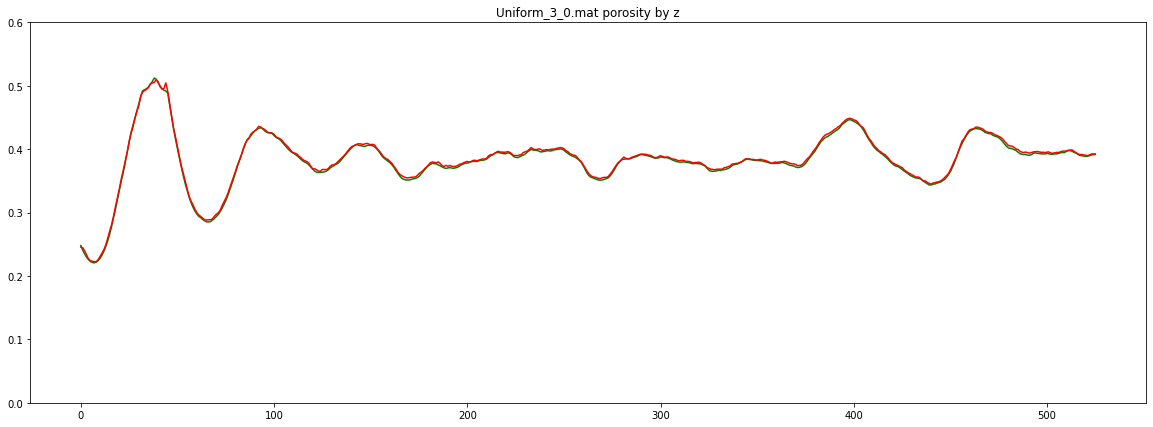

In [24]:
for filename in os.listdir(data_dir):
    extension = filename.split('.')[-1]
    if extension!= 'mat':
        continue
    mat = scipy.io.loadmat(os.path.join(data_dir, filename))
    size_sample = mat['predImage'].shape
    V_sample_z = size_sample[0]*size_sample[1]*1
    
    data_true_porosity_z = []
    data_predbin_porosity_z = [] 
    for id_slice in range(size_sample[2]):
        V_objects_z = mat['bwImage'][:,:,id_slice].sum()
        V_pred_objects_z = mat['predImage'][:,:,id_slice].sum()
        porosity_true_sample_z = (V_sample_z - V_objects_z) / V_sample_z
        porosity_predbin_sample_z = (V_sample_z - V_pred_objects_z) / V_sample_z        
        data_true_porosity_z.append(porosity_true_sample_z)
        data_predbin_porosity_z.append(porosity_predbin_sample_z)

    plt.figure(figsize=(20, 7))
    plt.figure(1)
    plt.title(f"{filename} porosity by z")
    plt.plot(data_true_porosity_z, color='green')
    plt.plot(data_predbin_porosity_z, color='red')
    plt.ylim(0,0.6)
    plt.show()

In [25]:
### Динамика пористости по n-слайсам (слайсы по оси z)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in long_scalars


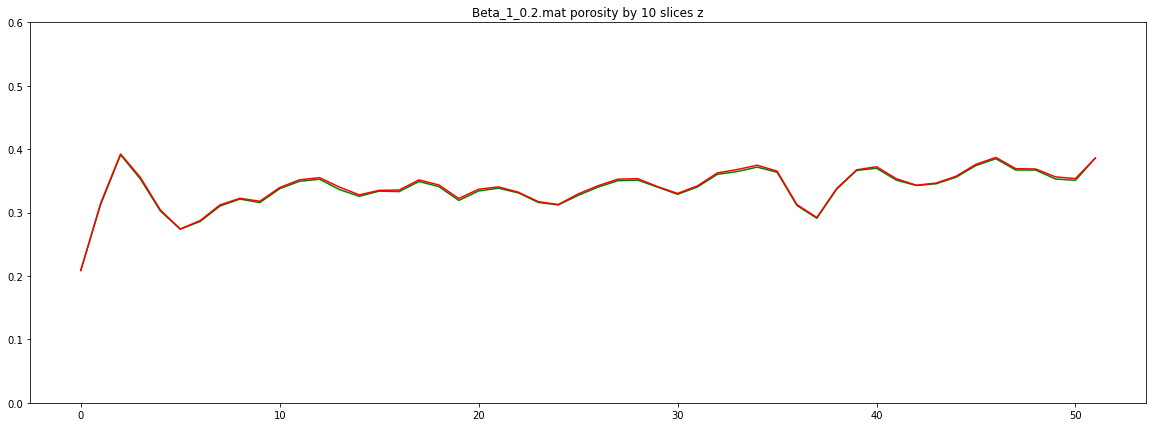

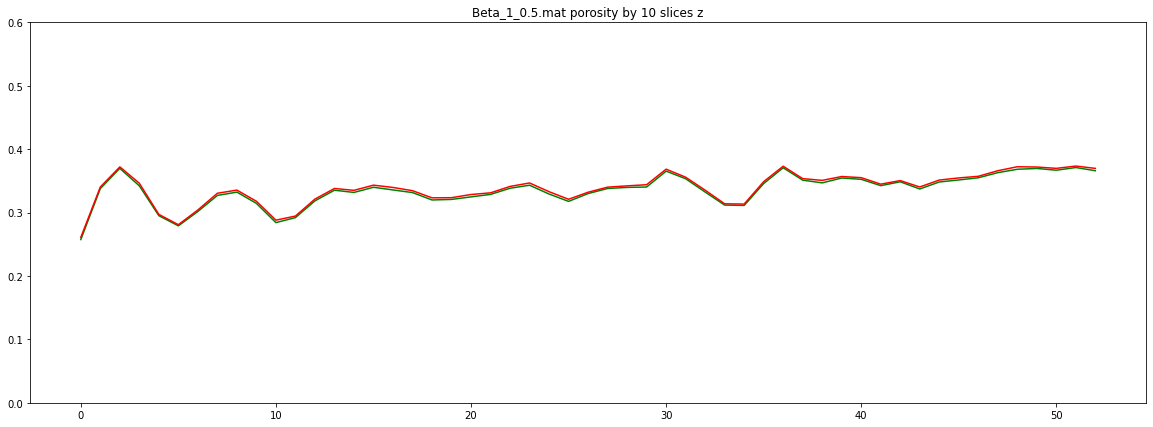

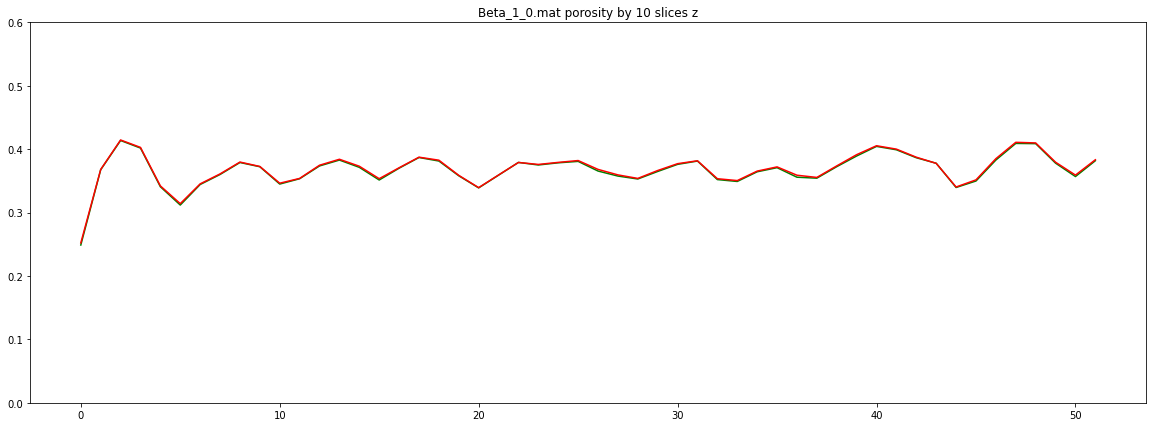

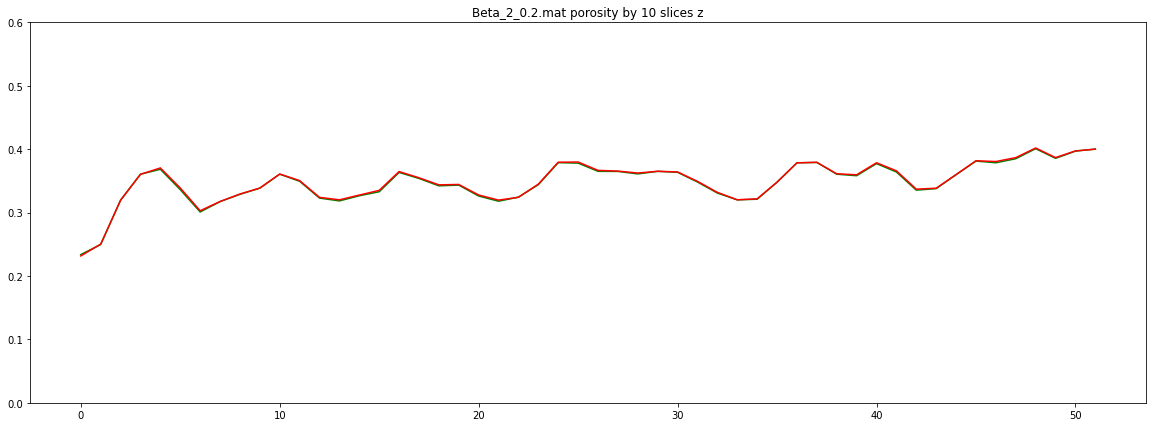

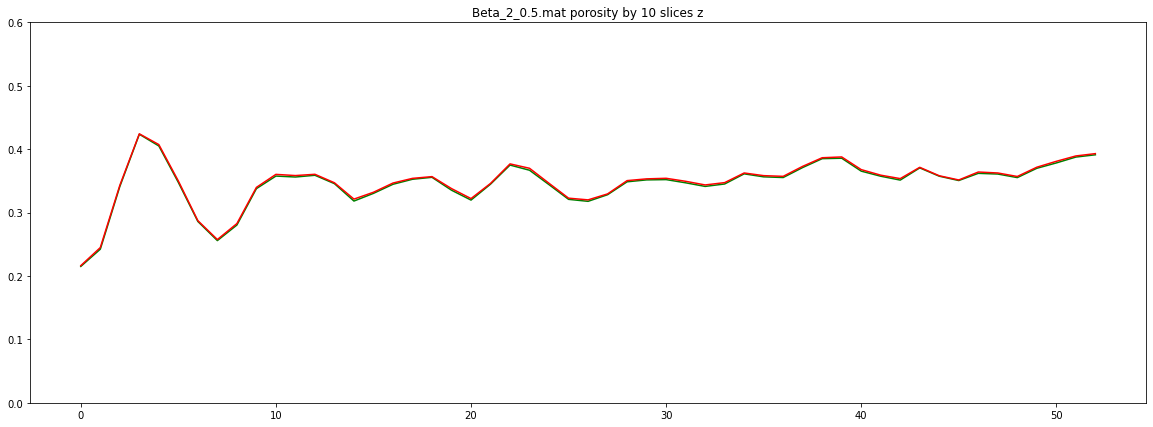

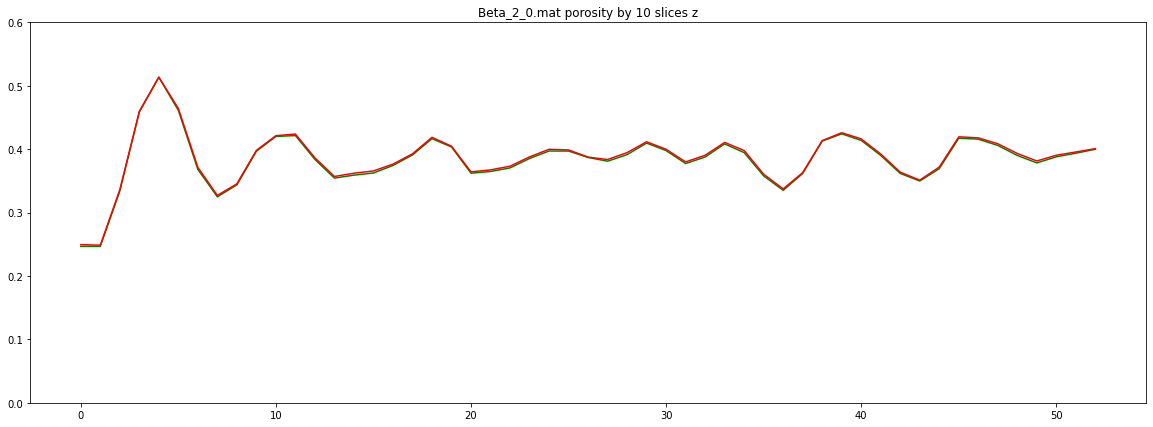

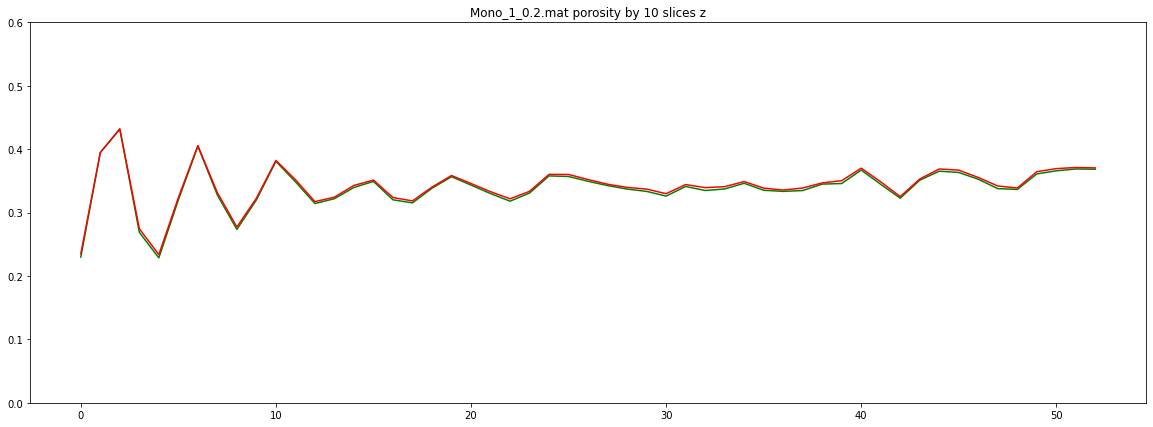

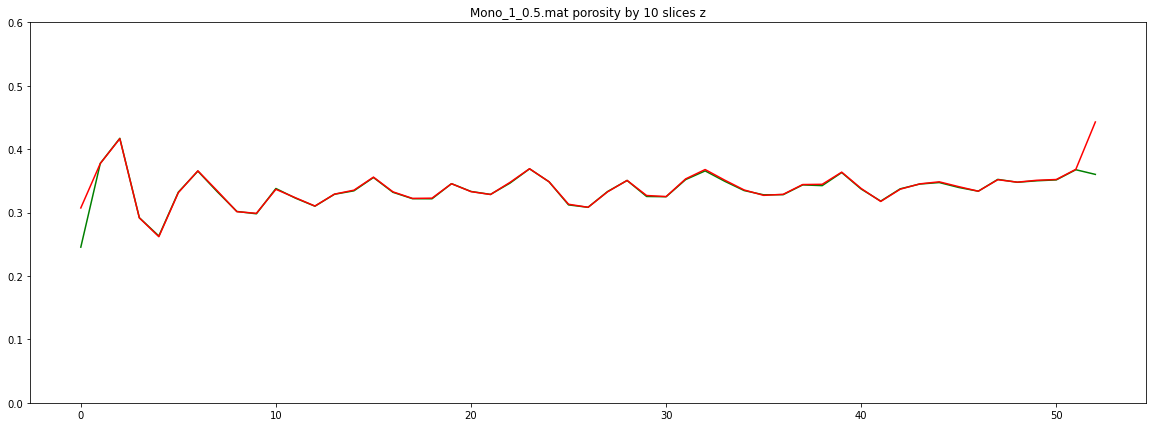

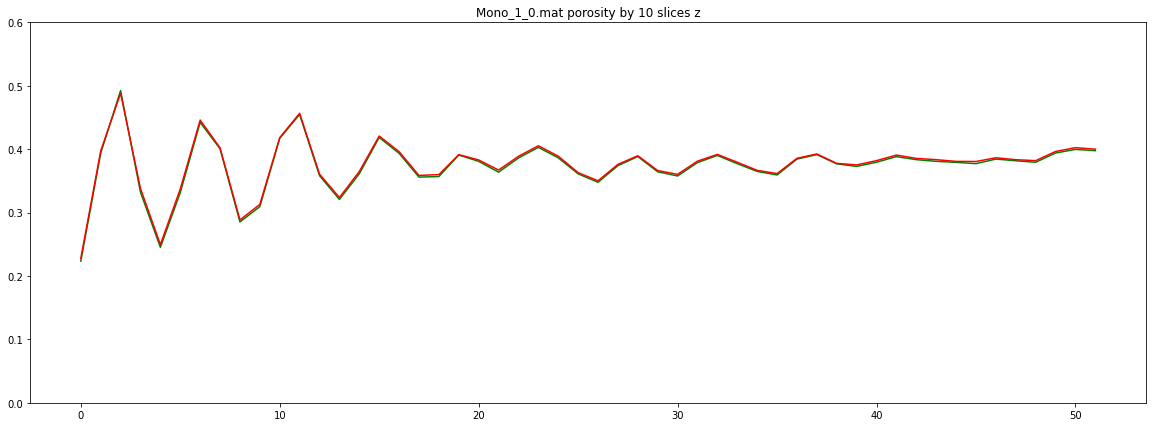

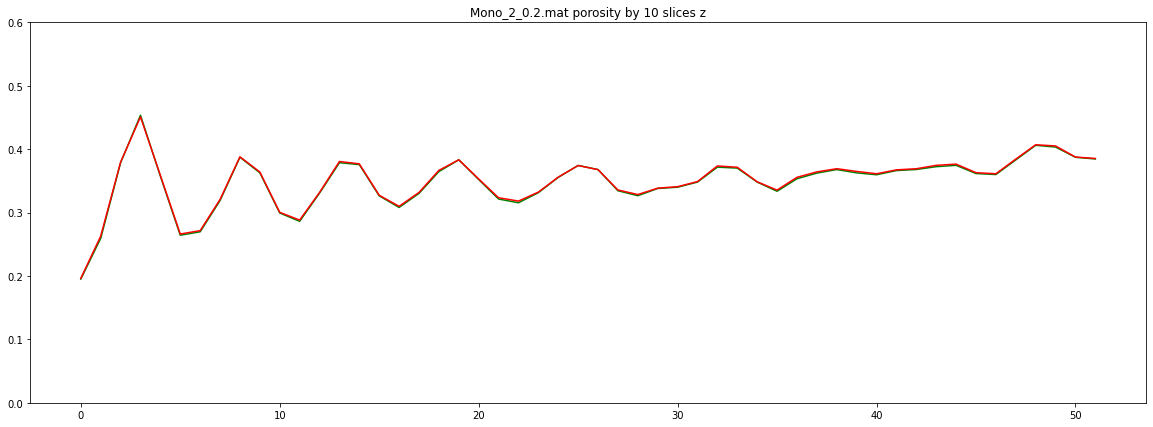

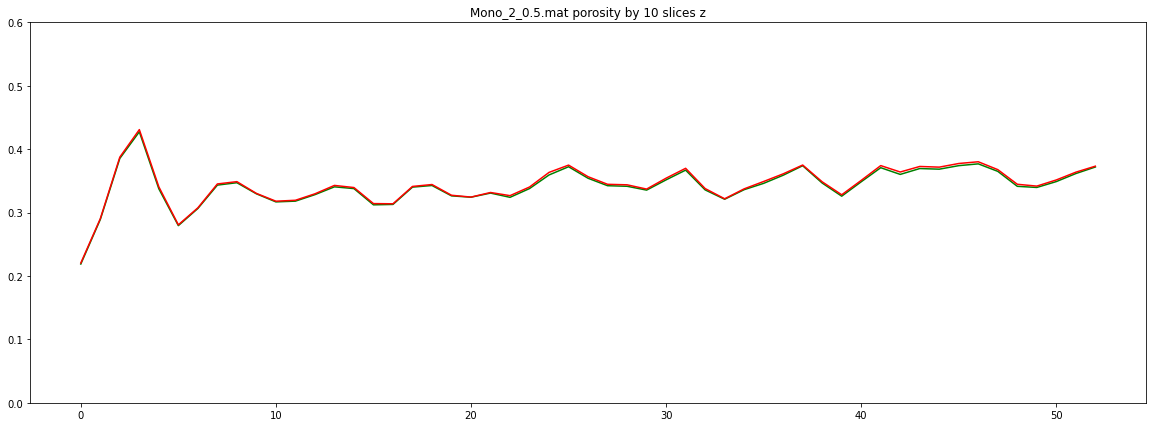

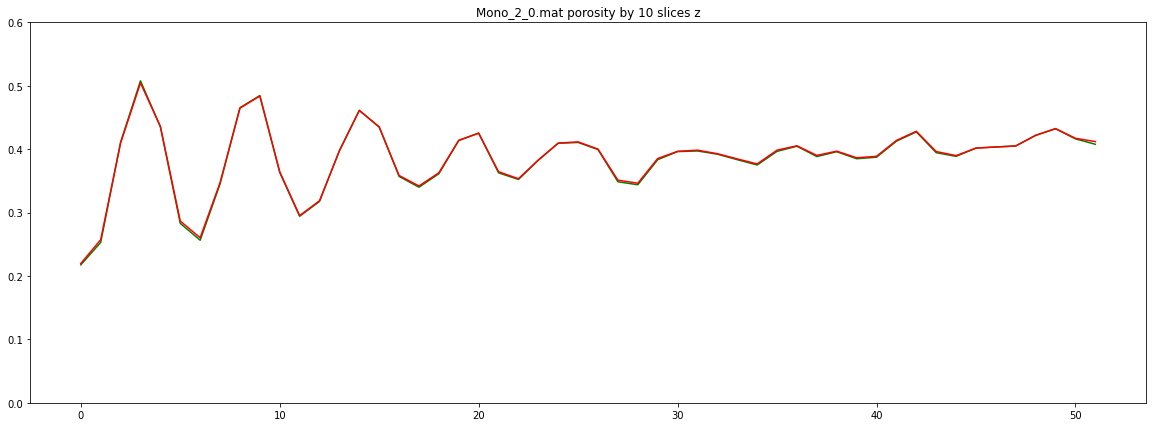

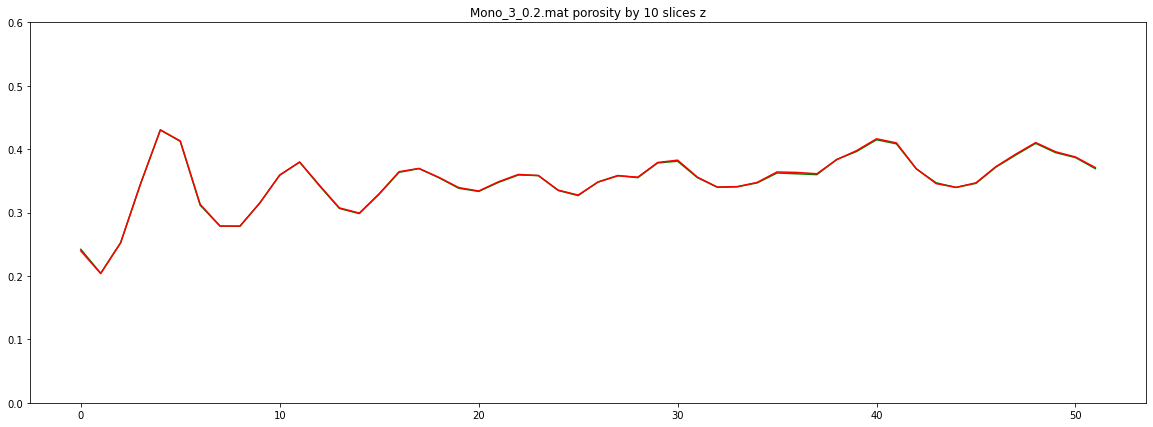

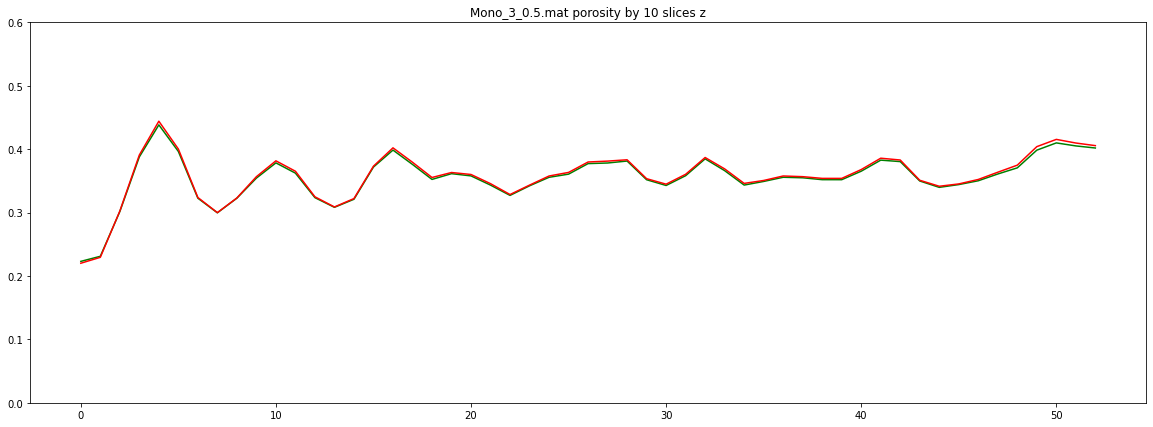

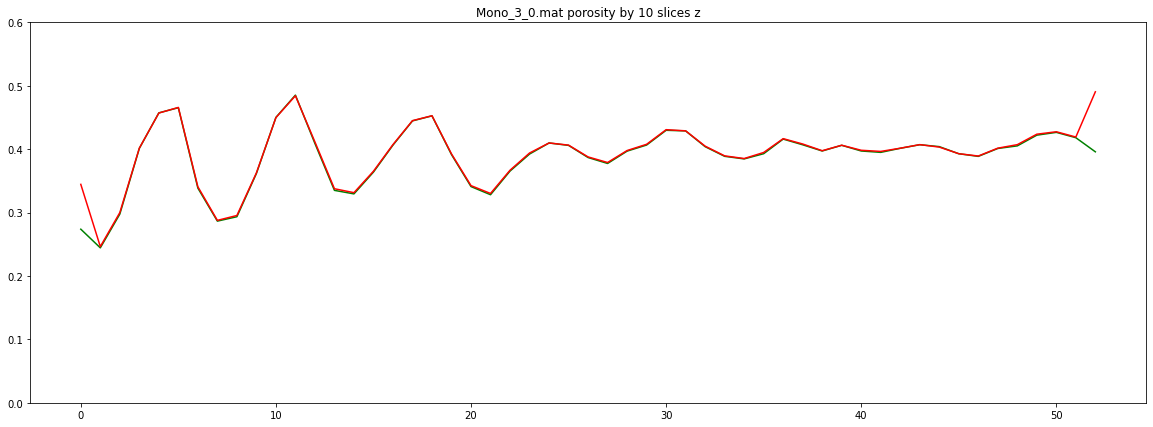

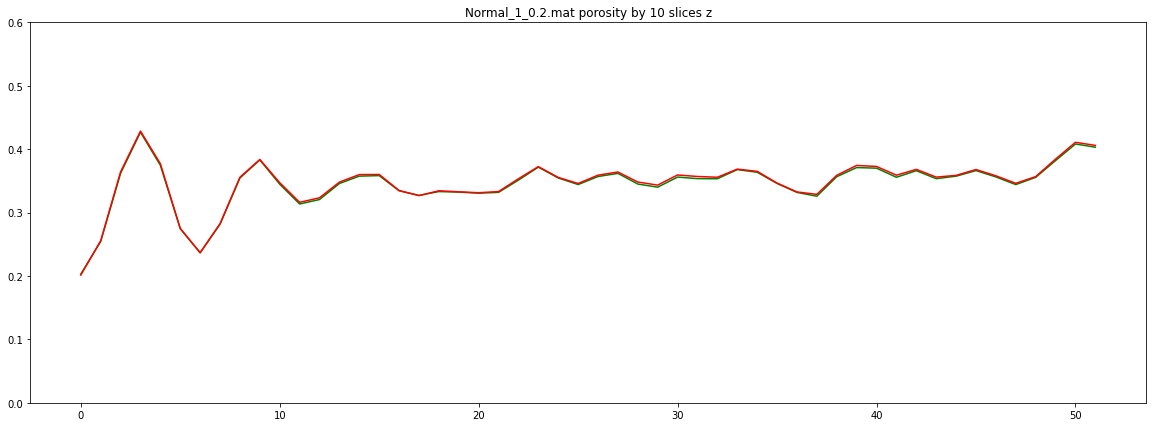

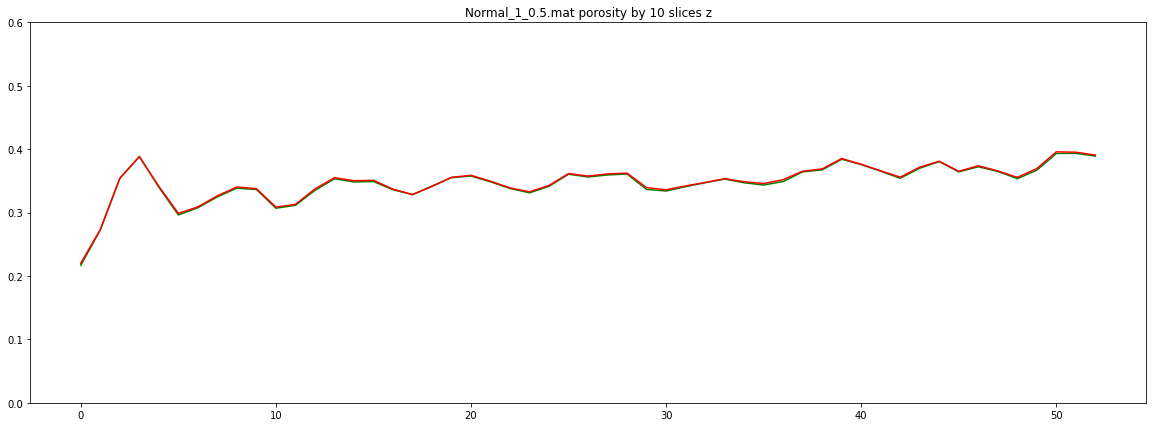

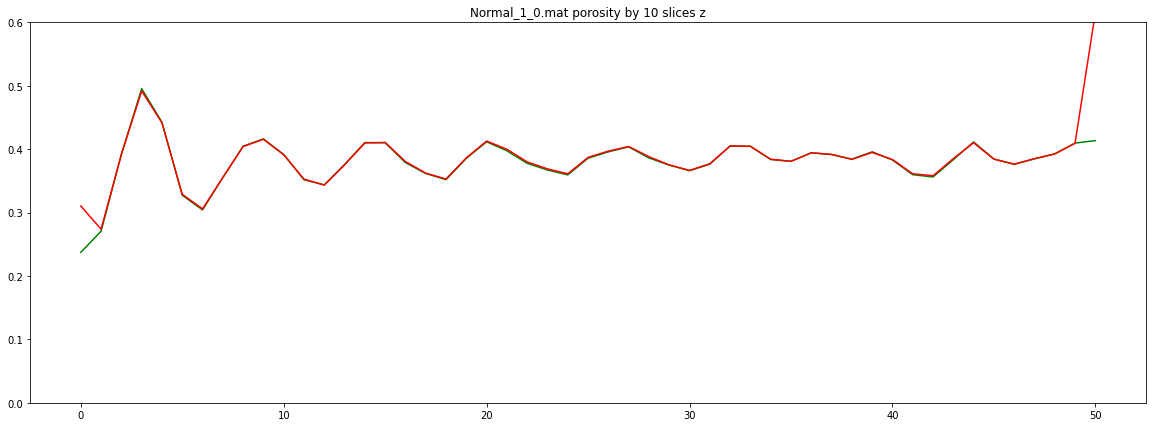

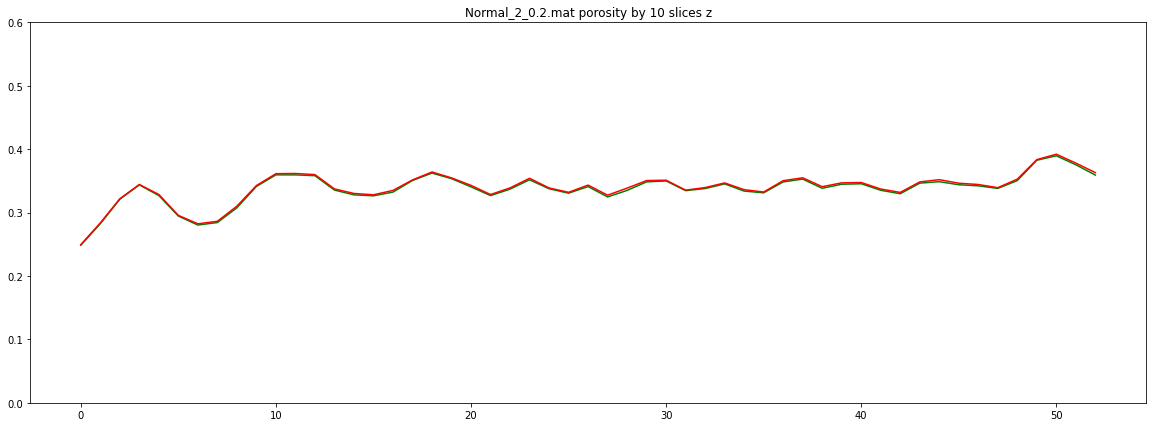

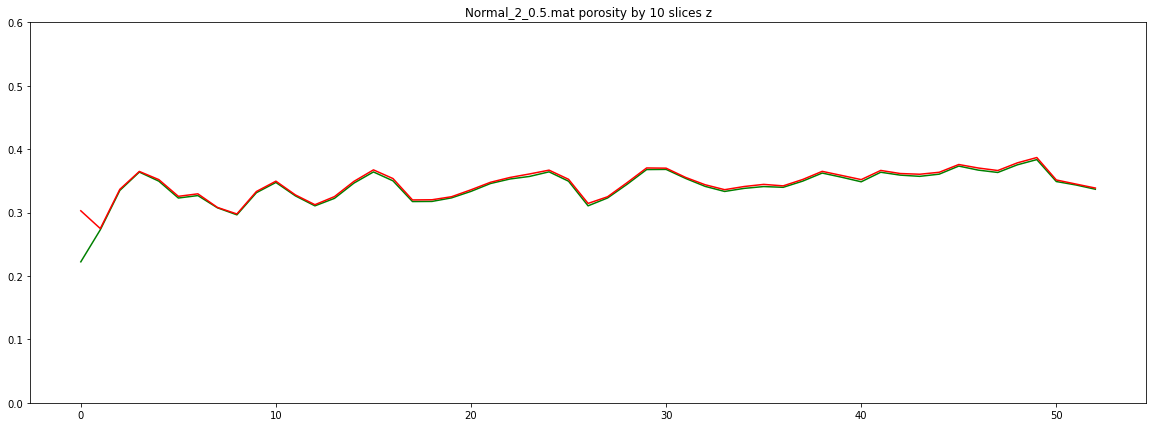

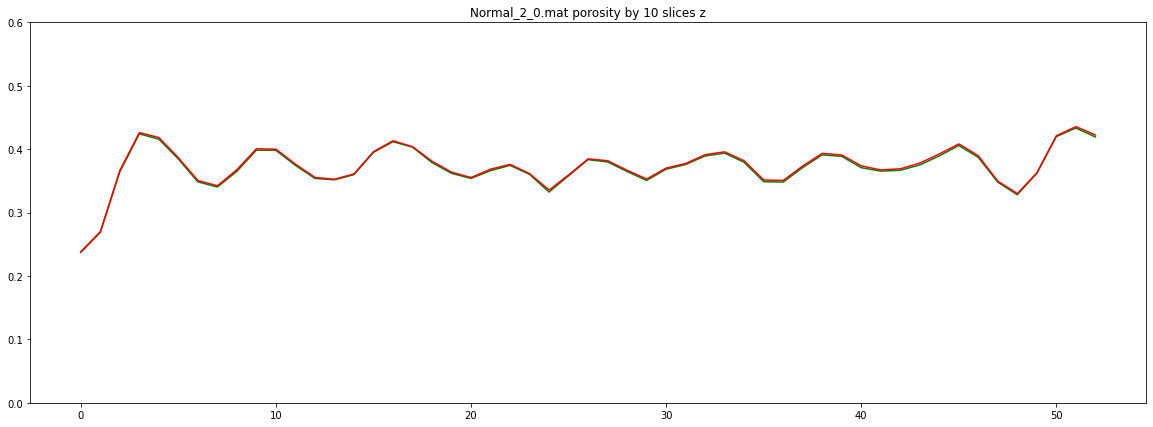

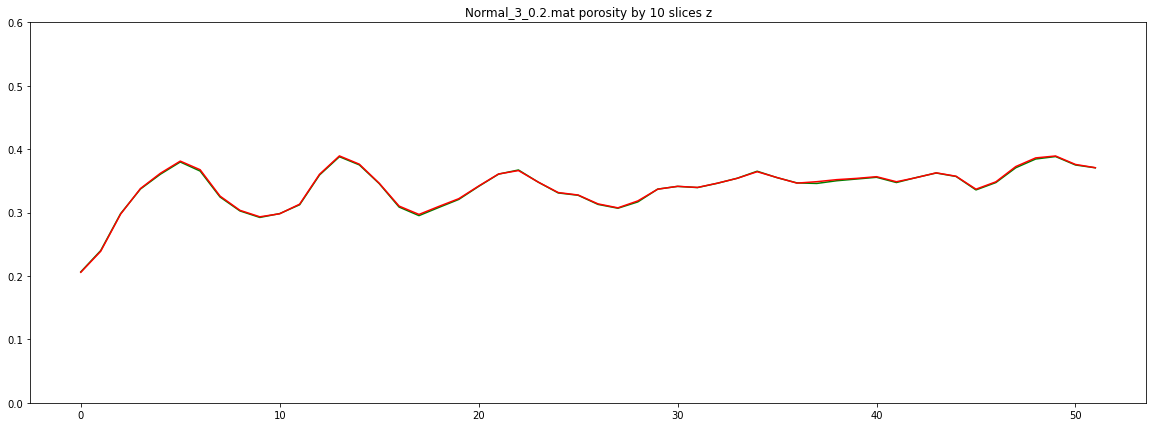

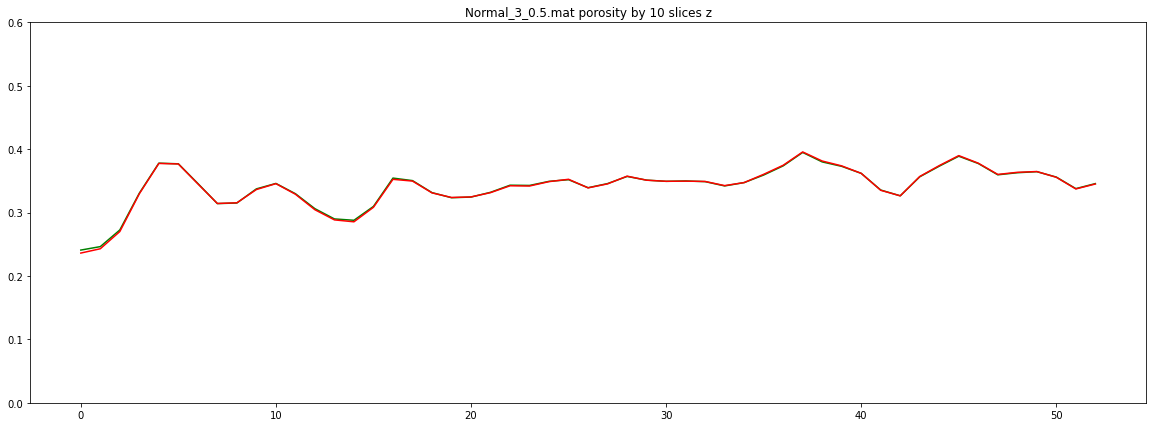

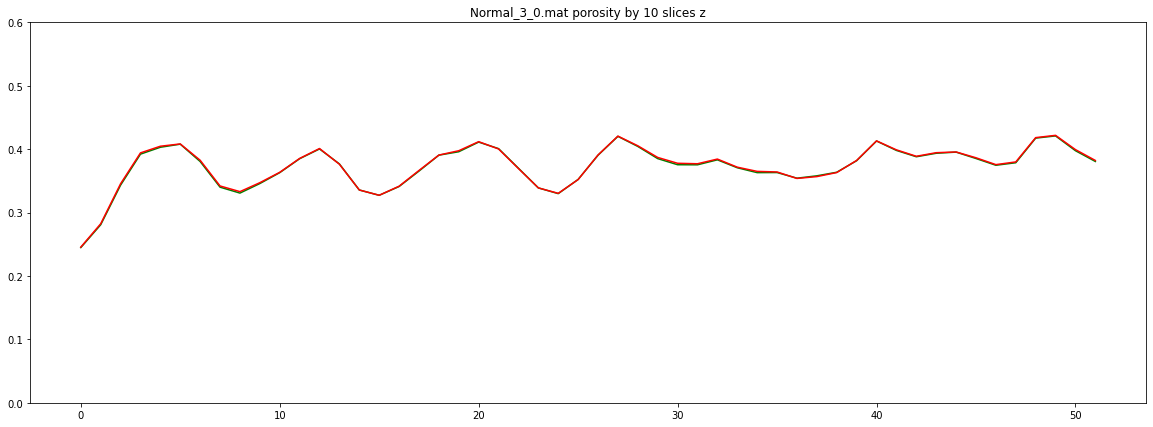

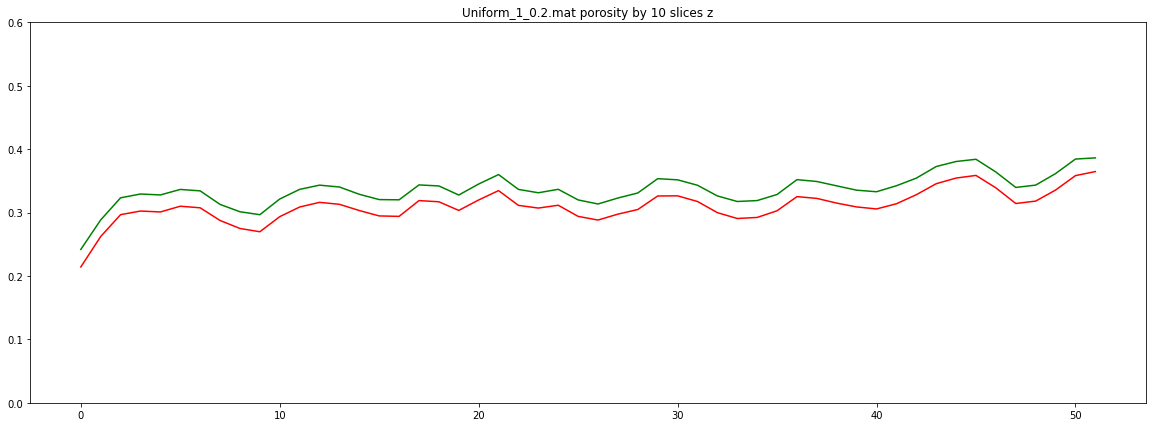

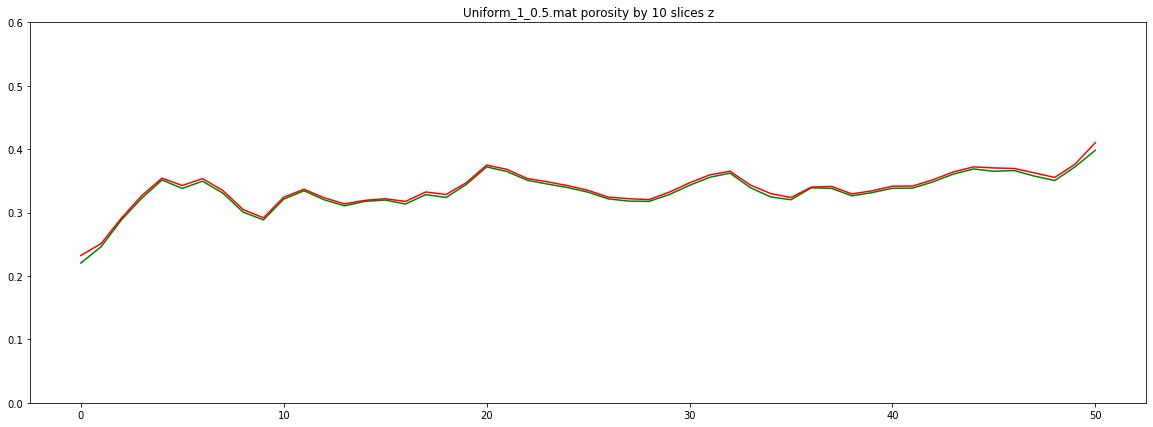

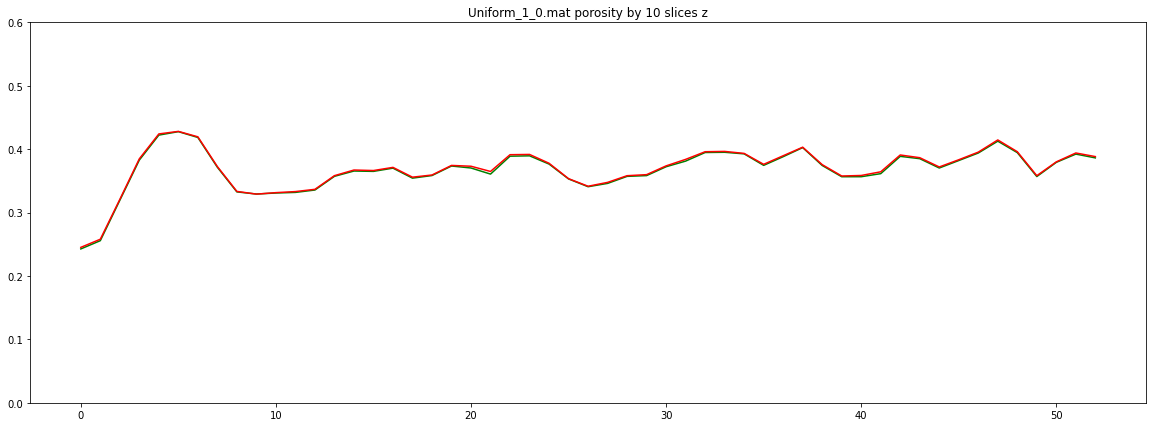

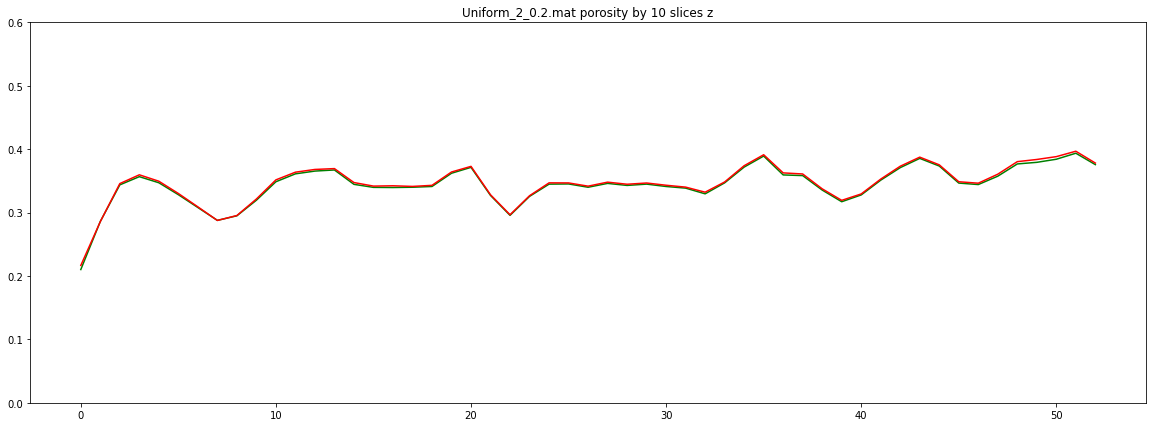

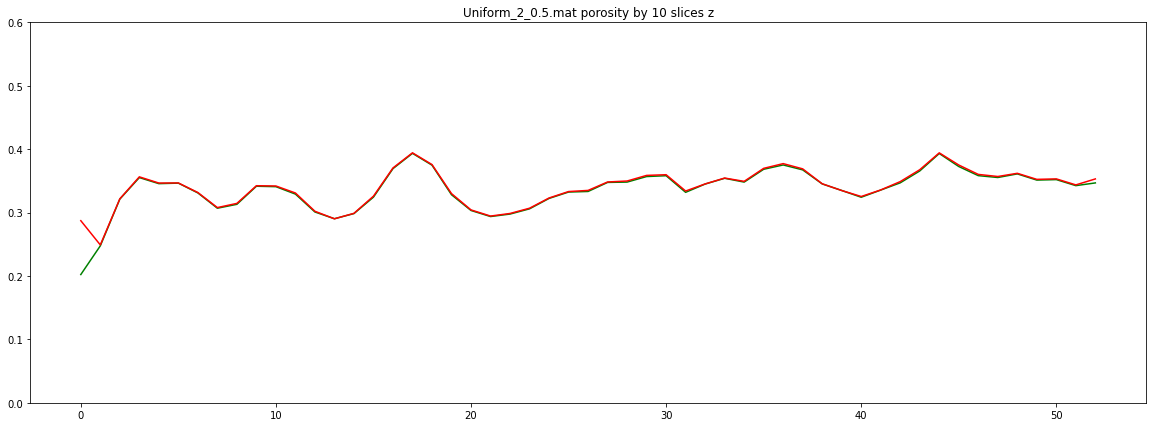

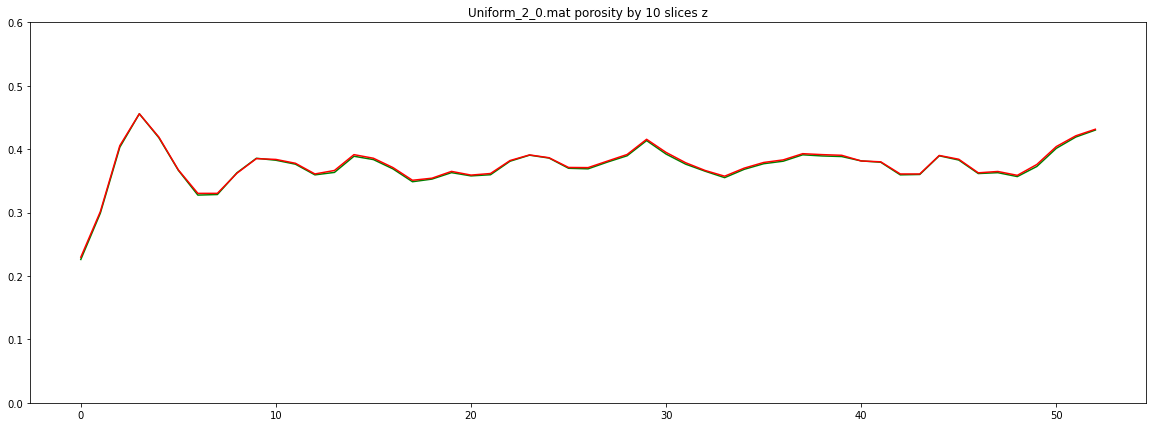

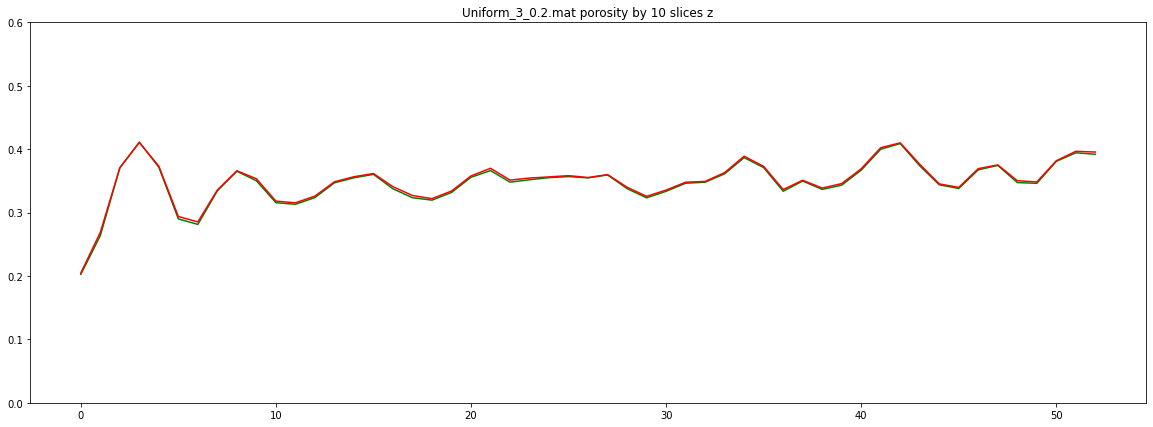

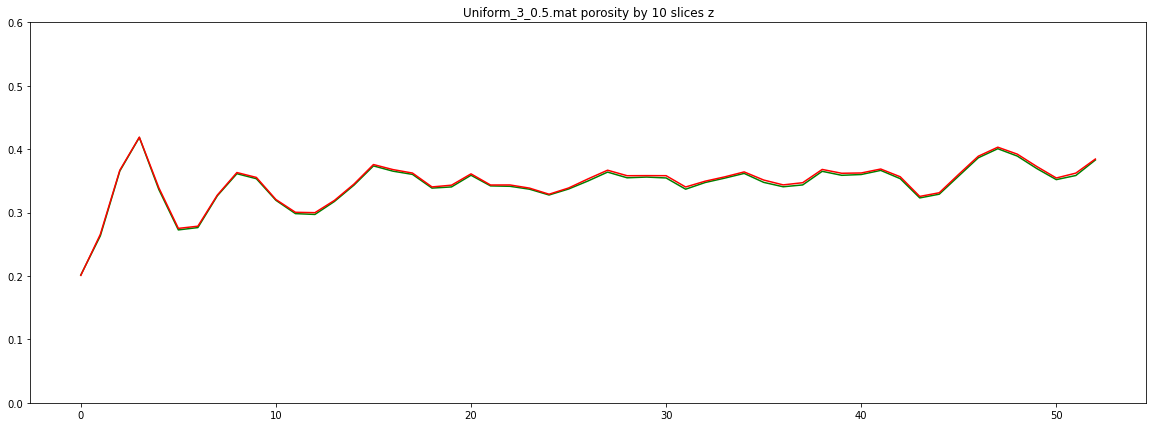

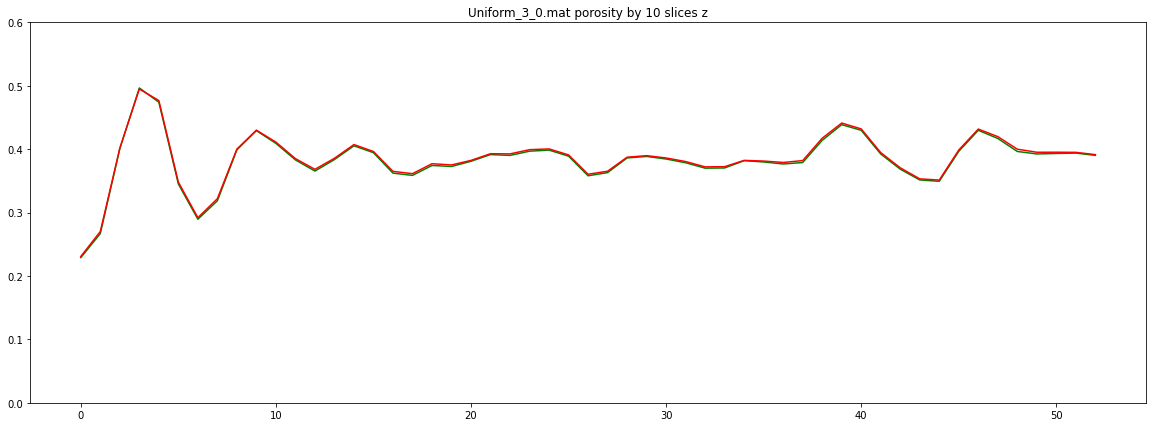

In [26]:
n_slice = 10
for filename in os.listdir(data_dir):
    extension = filename.split('.')[-1]
    if extension!= 'mat':
        continue
    mat = scipy.io.loadmat(os.path.join(data_dir, filename))    
    data_true_porosity_z = []
    data_predbin_porosity_z = [] 
    
    for id_slice in range(0, size_sample[2], n_slice):
        array_slice_z = mat['bwImage'][:,:,id_slice:id_slice+n_slice]
        V_sample_z = array_slice_z.shape[0]*array_slice_z.shape[1]*array_slice_z.shape[2]            
        V_objects_z = array_slice_z.sum()
        porosity_true_sample_z = (V_sample_z - V_objects_z) / V_sample_z
        data_true_porosity_z.append(porosity_true_sample_z)

        array_slice_z = mat['predImage'][:,:,id_slice:id_slice+n_slice]
        V_sample_z = array_slice_z.shape[0]*array_slice_z.shape[1]*array_slice_z.shape[2]            
        V_pred_objects_z = array_slice_z.sum()
        porosity_predbin_sample_z = (V_sample_z - V_pred_objects_z) / V_sample_z 
        data_predbin_porosity_z.append(porosity_predbin_sample_z)
        
        
    plt.figure(figsize=(20, 7))
    plt.figure(1)
    plt.title(f"{filename} porosity by {n_slice} slices z")
    plt.plot(data_true_porosity_z, color='green')
    plt.plot(data_predbin_porosity_z, color='red')
    plt.ylim(0,0.6)
    plt.show()
        
        